- input
  - results_*/processed/
- output
  - tables/* median tables
  - tables/* final data table
  - figures/* box plots 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools  # for cycling through colors if necessary
import glob
import re
import os

In [2]:
num_models = 5 #CHANGE
path = "D:/GAISSA/energy-repo/last_repo/june_gpu_test/"  # Adjust this path to your CSV files location #CHANGE
SAVE_FIGS = True
SAVE_TABLES = True

In [3]:
save_dir = path+"figures/"
tables_dir = path+"tables/"

try:
    os.mkdir(save_dir)
except Exception as e:
    print("could not create directory "+ save_dir )
    print(e)

try:
    os.mkdir(tables_dir)
except Exception as e:
    print("could not create directory "+ tables_dir )
    print(e)



could not create directory D:/GAISSA/energy-repo/last_repo/june_gpu_test/figures/
[WinError 183] Cannot create a file when that file already exists: 'D:/GAISSA/energy-repo/last_repo/june_gpu_test/figures/'
could not create directory D:/GAISSA/energy-repo/last_repo/june_gpu_test/tables/
[WinError 183] Cannot create a file when that file already exists: 'D:/GAISSA/energy-repo/last_repo/june_gpu_test/tables/'


In [4]:
def remove_condition_rows(condition_to_remove,df):
    # example: condition = merged_df['label']  == 'idle_idle'
    df1 = df.copy()
    return df1[~condition_to_remove]

In [5]:
def save_latex_table(df,save_dir):
    df = df.copy()
    df.columns = [col.replace('_', ' ') for col in df.columns]
    
    latex_table = df.to_latex(index=False) 

    # Define the filename
    filename = save_dir
    
    # Open the file in write mode
    with open(filename, 'w') as file:
        file.write(latex_table) if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")
        
    # Print LaTeX table
    print(latex_table)

# RQ1.1: Energy

## Profilers used metrics previsualization

### Energibridge

In [6]:
# Path where the CSV files are stored
all_files_energi = glob.glob(path + "/results_*/processed/energi_processed.csv")
all_files_energi

['D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_1\\processed\\energi_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_10\\processed\\energi_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_2\\processed\\energi_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_3\\processed\\energi_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_4\\processed\\energi_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_5\\processed\\energi_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_6\\processed\\energi_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_7\\processed\\energi_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_8\\processed\\energi_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_9\\processed\\energi_processed.csv']

In [7]:
result_numbers = []

li = []
for my_file in all_files_energi:
    # The regex pattern to find "results_" followed by one or more digits
    df = pd.read_csv(my_file, index_col=None, header=0)
    
    match = re.search(r'results_(\d+)', my_file)
    if match:
        # Append the found number to the list
        result_numbers.append(int(match.group(1)))

    df['experiment'] = result_numbers[-1]
    li.append(df)

print(result_numbers)
# Combine all data into one DataFrame
energi_df = pd.concat(li, axis=0, ignore_index=True)
energi_df

[1, 10, 2, 3, 4, 5, 6, 7, 8, 9]


,time,runtime,model,CPU_ENERGY (J),TOTAL_MEMORY,TOTAL_SWAP,USED_MEMORY,USED_SWAP,AVG_CPU_USAGE_SAMP,label,avg_TOTAL_MEMORY,avg_TOTAL_SWAP,avg_USED_MEMORY,avg_USED_SWAP,avg_cpu_usage_config,energy,avg_used_memory_pct_config,experiment
0,2024-06-08 21:42:00.400,idle,idle,5.166161e+05,66575933440,2147479552,2241388544,0,5.237742,idle_idle,6.657593e+10,2.147480e+09,2.794639e+09,0.0,0.143838,5356.125122,4.197672,1
1,2024-06-08 21:42:00.400,idle,idle,5.166162e+05,66575933440,2147479552,2246549504,0,5.237742,idle_idle,6.657593e+10,2.147480e+09,2.794639e+09,0.0,0.143838,5356.125122,4.197672,1
2,2024-06-08 21:42:00.600,idle,idle,5.166275e+05,66575933440,2147479552,2353451008,0,4.872685,idle_idle,6.657593e+10,2.147480e+09,2.794639e+09,0.0,0.143838,5356.125122,4.197672,1
3,2024-06-08 21:42:00.800,idle,idle,5.166393e+05,66575933440,2147479552,2402861056,0,4.872685,idle_idle,6.657593e+10,2.147480e+09,2.794639e+09,0.0,0.143838,5356.125122,4.197672,1
4,2024-06-08 21:42:01.000,idle,idle,5.166517e+05,66575933440,2147479552,2452594688,0,6.209758,idle_idle,6.657593e+10,2.147480e+09,2.794639e+09,0.0,0.143838,5356.125122,4.197672,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209647,2024-06-30 15:25:40.053,torchscript,phi2,3.525889e+06,66575933440,2147479552,8365015040,0,0.148810,torchscript_phi2,6.657593e+10,2.147480e+09,8.255906e+09,0.0,0.658563,2750.561356,12.400737,9
209648,2024-06-30 15:25:40.253,torchscript,phi2,3.525893e+06,66575933440,2147479552,8365015040,0,0.305060,torchscript_phi2,6.657593e+10,2.147480e+09,8.255906e+09,0.0,0.658563,2750.561356,12.400737,9
209649,2024-06-30 15:25:40.453,torchscript,phi2,3.525899e+06,66575933440,2147479552,8365015040,0,0.328947,torchscript_phi2,6.657593e+10,2.147480e+09,8.255906e+09,0.0,0.658563,2750.561356,12.400737,9
209650,2024-06-30 15:25:40.653,torchscript,phi2,3.525903e+06,66575933440,2147479552,8365010944,0,0.297619,torchscript_phi2,6.657593e+10,2.147480e+09,8.255906e+09,0.0,0.658563,2750.561356,12.400737,9


In [8]:
# ## add "experiment" column 1,2...10

# # List to hold data from each file
# li = []

# # Read each file and append to list
# n=1
# for filename in all_files_energi:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     df['experiment'] = n
#     li.append(df)
#     n+=1
    

# # Combine all data into one DataFrame
# energi_df = pd.concat(li, axis=0, ignore_index=True)
# energi_df

In [9]:
energi_df.columns

Index(['time', 'runtime', 'model', 'CPU_ENERGY (J)', 'TOTAL_MEMORY',
       'TOTAL_SWAP', 'USED_MEMORY', 'USED_SWAP', 'AVG_CPU_USAGE_SAMP', 'label',
       'avg_TOTAL_MEMORY', 'avg_TOTAL_SWAP', 'avg_USED_MEMORY',
       'avg_USED_SWAP', 'avg_cpu_usage_config', 'energy',
       'avg_used_memory_pct_config', 'experiment'],
      dtype='object')

In [10]:
energi_df.columns

Index(['time', 'runtime', 'model', 'CPU_ENERGY (J)', 'TOTAL_MEMORY',
       'TOTAL_SWAP', 'USED_MEMORY', 'USED_SWAP', 'AVG_CPU_USAGE_SAMP', 'label',
       'avg_TOTAL_MEMORY', 'avg_TOTAL_SWAP', 'avg_USED_MEMORY',
       'avg_USED_SWAP', 'avg_cpu_usage_config', 'energy',
       'avg_used_memory_pct_config', 'experiment'],
      dtype='object')

In [11]:
energi_df

,time,runtime,model,CPU_ENERGY (J),TOTAL_MEMORY,TOTAL_SWAP,USED_MEMORY,USED_SWAP,AVG_CPU_USAGE_SAMP,label,avg_TOTAL_MEMORY,avg_TOTAL_SWAP,avg_USED_MEMORY,avg_USED_SWAP,avg_cpu_usage_config,energy,avg_used_memory_pct_config,experiment
0,2024-06-08 21:42:00.400,idle,idle,5.166161e+05,66575933440,2147479552,2241388544,0,5.237742,idle_idle,6.657593e+10,2.147480e+09,2.794639e+09,0.0,0.143838,5356.125122,4.197672,1
1,2024-06-08 21:42:00.400,idle,idle,5.166162e+05,66575933440,2147479552,2246549504,0,5.237742,idle_idle,6.657593e+10,2.147480e+09,2.794639e+09,0.0,0.143838,5356.125122,4.197672,1
2,2024-06-08 21:42:00.600,idle,idle,5.166275e+05,66575933440,2147479552,2353451008,0,4.872685,idle_idle,6.657593e+10,2.147480e+09,2.794639e+09,0.0,0.143838,5356.125122,4.197672,1
3,2024-06-08 21:42:00.800,idle,idle,5.166393e+05,66575933440,2147479552,2402861056,0,4.872685,idle_idle,6.657593e+10,2.147480e+09,2.794639e+09,0.0,0.143838,5356.125122,4.197672,1
4,2024-06-08 21:42:01.000,idle,idle,5.166517e+05,66575933440,2147479552,2452594688,0,6.209758,idle_idle,6.657593e+10,2.147480e+09,2.794639e+09,0.0,0.143838,5356.125122,4.197672,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209647,2024-06-30 15:25:40.053,torchscript,phi2,3.525889e+06,66575933440,2147479552,8365015040,0,0.148810,torchscript_phi2,6.657593e+10,2.147480e+09,8.255906e+09,0.0,0.658563,2750.561356,12.400737,9
209648,2024-06-30 15:25:40.253,torchscript,phi2,3.525893e+06,66575933440,2147479552,8365015040,0,0.305060,torchscript_phi2,6.657593e+10,2.147480e+09,8.255906e+09,0.0,0.658563,2750.561356,12.400737,9
209649,2024-06-30 15:25:40.453,torchscript,phi2,3.525899e+06,66575933440,2147479552,8365015040,0,0.328947,torchscript_phi2,6.657593e+10,2.147480e+09,8.255906e+09,0.0,0.658563,2750.561356,12.400737,9
209650,2024-06-30 15:25:40.653,torchscript,phi2,3.525903e+06,66575933440,2147479552,8365010944,0,0.297619,torchscript_phi2,6.657593e+10,2.147480e+09,8.255906e+09,0.0,0.658563,2750.561356,12.400737,9


In [12]:
# phi2 model had errors

#condition = energi_df['label'].str.endswith('phi2')
#energi_plot = remove_condition_rows( condition, energi_df)


energi_plot = energi_df
energi_plot

,time,runtime,model,CPU_ENERGY (J),TOTAL_MEMORY,TOTAL_SWAP,USED_MEMORY,USED_SWAP,AVG_CPU_USAGE_SAMP,label,avg_TOTAL_MEMORY,avg_TOTAL_SWAP,avg_USED_MEMORY,avg_USED_SWAP,avg_cpu_usage_config,energy,avg_used_memory_pct_config,experiment
0,2024-06-08 21:42:00.400,idle,idle,5.166161e+05,66575933440,2147479552,2241388544,0,5.237742,idle_idle,6.657593e+10,2.147480e+09,2.794639e+09,0.0,0.143838,5356.125122,4.197672,1
1,2024-06-08 21:42:00.400,idle,idle,5.166162e+05,66575933440,2147479552,2246549504,0,5.237742,idle_idle,6.657593e+10,2.147480e+09,2.794639e+09,0.0,0.143838,5356.125122,4.197672,1
2,2024-06-08 21:42:00.600,idle,idle,5.166275e+05,66575933440,2147479552,2353451008,0,4.872685,idle_idle,6.657593e+10,2.147480e+09,2.794639e+09,0.0,0.143838,5356.125122,4.197672,1
3,2024-06-08 21:42:00.800,idle,idle,5.166393e+05,66575933440,2147479552,2402861056,0,4.872685,idle_idle,6.657593e+10,2.147480e+09,2.794639e+09,0.0,0.143838,5356.125122,4.197672,1
4,2024-06-08 21:42:01.000,idle,idle,5.166517e+05,66575933440,2147479552,2452594688,0,6.209758,idle_idle,6.657593e+10,2.147480e+09,2.794639e+09,0.0,0.143838,5356.125122,4.197672,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209647,2024-06-30 15:25:40.053,torchscript,phi2,3.525889e+06,66575933440,2147479552,8365015040,0,0.148810,torchscript_phi2,6.657593e+10,2.147480e+09,8.255906e+09,0.0,0.658563,2750.561356,12.400737,9
209648,2024-06-30 15:25:40.253,torchscript,phi2,3.525893e+06,66575933440,2147479552,8365015040,0,0.305060,torchscript_phi2,6.657593e+10,2.147480e+09,8.255906e+09,0.0,0.658563,2750.561356,12.400737,9
209649,2024-06-30 15:25:40.453,torchscript,phi2,3.525899e+06,66575933440,2147479552,8365015040,0,0.328947,torchscript_phi2,6.657593e+10,2.147480e+09,8.255906e+09,0.0,0.658563,2750.561356,12.400737,9
209650,2024-06-30 15:25:40.653,torchscript,phi2,3.525903e+06,66575933440,2147479552,8365010944,0,0.297619,torchscript_phi2,6.657593e+10,2.147480e+09,8.255906e+09,0.0,0.658563,2750.561356,12.400737,9


In [13]:
#condition = energi_plot['label'].str.endswith('idle')

#energi_plot = remove_condition_rows( condition, energi_plot)
#energi_plot

In [14]:
#energi_plot.rename(columns={'energy': 'Energy (Energibridge) [J]'}, inplace=True)
#energi_plot.rename(columns={'AVG_CPU_USAGE_CONFIG': 'CPU usage (Energibridge) [%]'}, inplace=True)
#energi_plot.rename(columns={'avg_USED_MEMORY': 'Used memory (Energibridge) [B]'}, inplace=True)


In [15]:
energi_plot.columns

Index(['time', 'runtime', 'model', 'CPU_ENERGY (J)', 'TOTAL_MEMORY',
       'TOTAL_SWAP', 'USED_MEMORY', 'USED_SWAP', 'AVG_CPU_USAGE_SAMP', 'label',
       'avg_TOTAL_MEMORY', 'avg_TOTAL_SWAP', 'avg_USED_MEMORY',
       'avg_USED_SWAP', 'avg_cpu_usage_config', 'energy',
       'avg_used_memory_pct_config', 'experiment'],
      dtype='object')

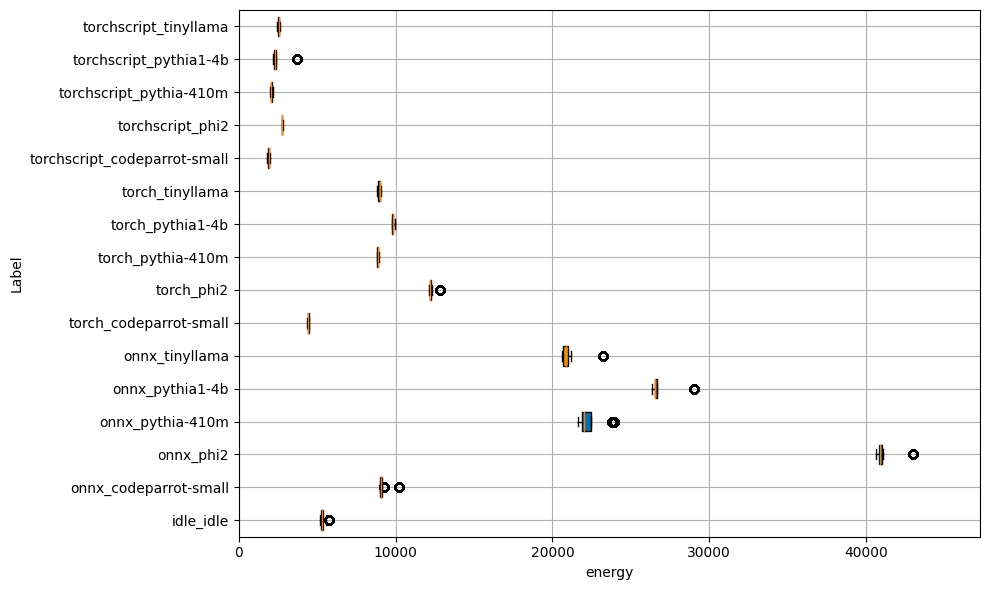

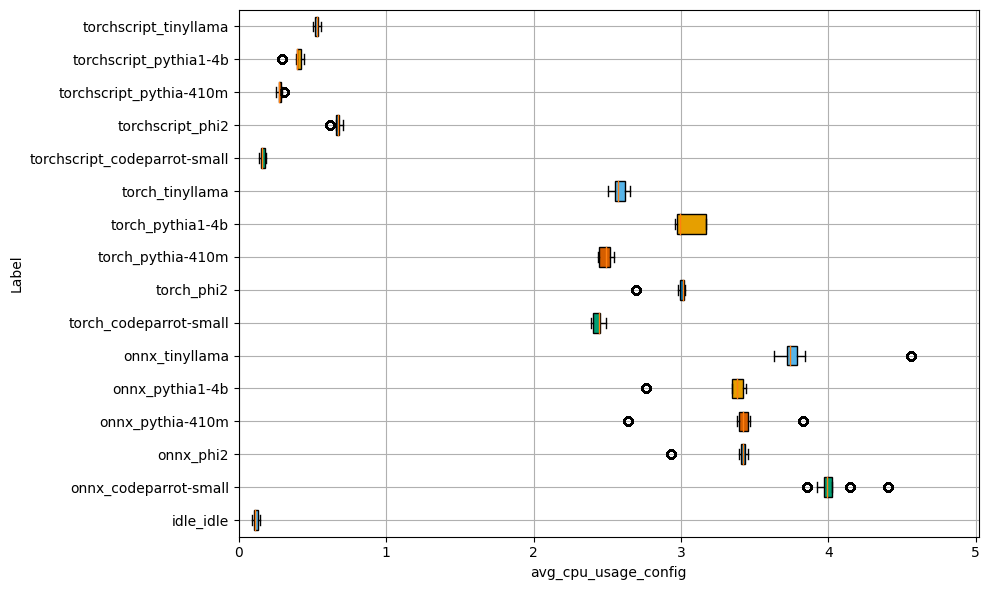

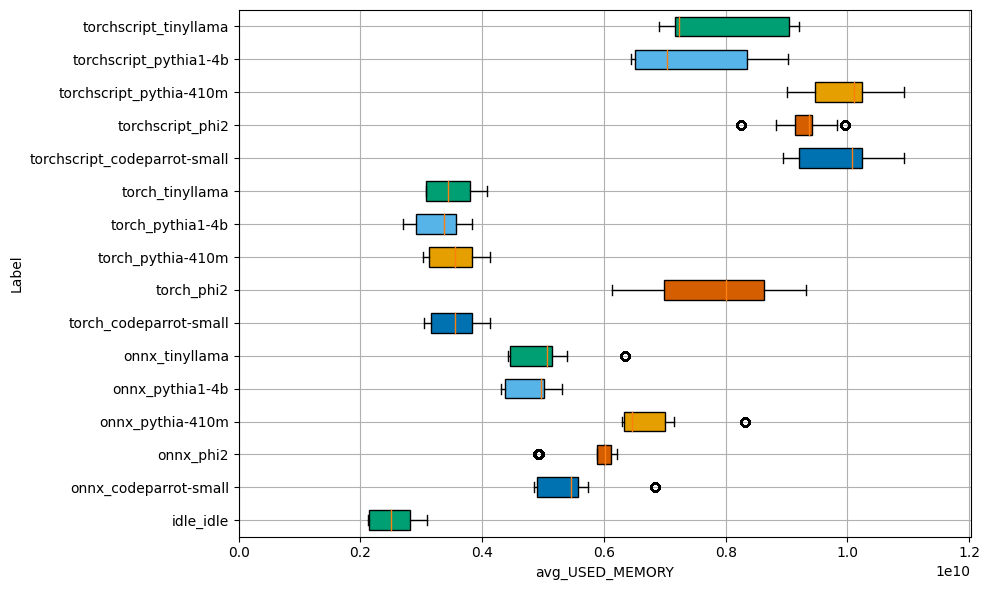

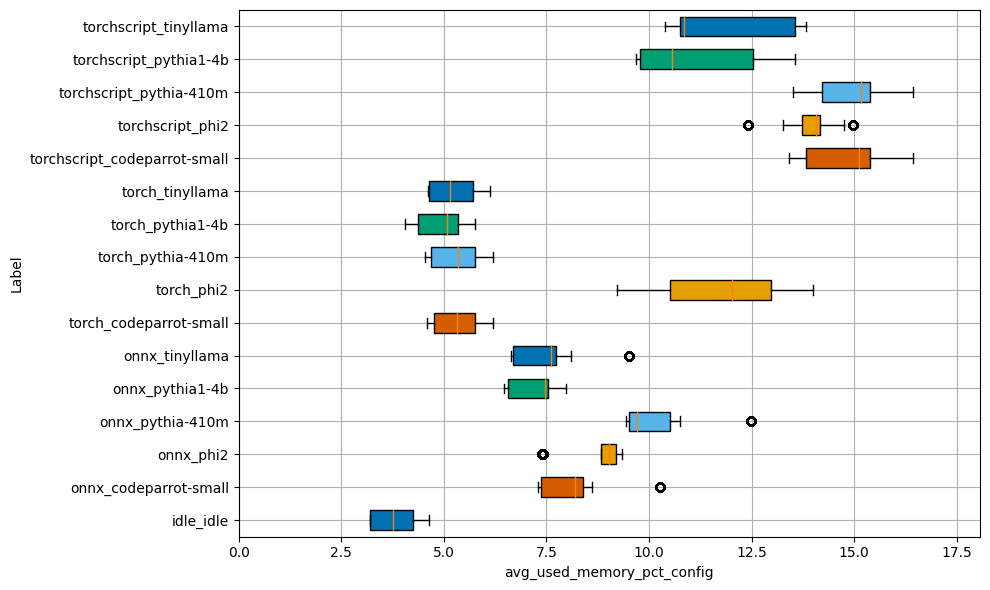

In [16]:


# Assuming combined_df is already created and contains the data
#variables_to_plot = ['diff_CPU_ENERGY (J)', 'avg_diff_CPU_ENERGY (J)', 'avg_TOTAL_MEMORY', 'minus_avg_USED_MEMORY', 'avg_TOTAL_SWAP']

variables_to_plot = [ 'Energy (Energibridge) [J]', "CPU usage (Energibridge) [%]",  'Used memory (Energibridge) [B]',]
variables_to_plot = [ 'energy', "avg_cpu_usage_config",  'avg_USED_MEMORY','avg_used_memory_pct_config']

# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
colors = colors[:num_models]
# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label' : runtime_model
    grouped = energi_plot.groupby('label')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color

    # Customizing plot
    #plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.xlim([0,energi_plot[variable].max()*1.1])
    
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to make room for labels
    #plt.savefig(save_dir+"energi_"+variable)

plt.show()


In [17]:
#energi_df.loc[energi_df['experiment'] == 10] 


### Nvidia

In [18]:
# Path where the CSV files are stored
path = "D:/GAISSA/energy-repo/last_repo/june_gpu_test/"  # Adjust this path to your CSV files location
all_files_nvidia = glob.glob(path + "/results_*/processed/nvidia*_processed.csv")
all_files_nvidia

['D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_1\\processed\\nvidia_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_10\\processed\\nvidia_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_2\\processed\\nvidia_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_3\\processed\\nvidia_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_4\\processed\\nvidia_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_5\\processed\\nvidia_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_6\\processed\\nvidia_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_7\\processed\\nvidia_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_8\\processed\\nvidia_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_9\\processed\\nvidia_processed.csv']

In [19]:
result_numbers = []

li = []
for my_file in all_files_nvidia:
    # The regex pattern to find "results_" followed by one or more digits
    df = pd.read_csv(my_file, index_col=None, header=0)
    
    match = re.search(r'results_(\d+)', my_file)
    if match:
        # Append the found number to the list
        result_numbers.append(int(match.group(1)))

    df['experiment'] = result_numbers[-1]
    li.append(df)

print(result_numbers)
# Combine all data into one DataFrame
nvidia_df = pd.concat(li, axis=0, ignore_index=True)
nvidia_df

[1, 10, 2, 3, 4, 5, 6, 7, 8, 9]


,time,runtime,model,utilization.gpu [%],utilization.memory [%],memory.total [MiB],memory.used [MiB],power.draw [W],power.max_limit [W],temperature.gpu,...,used_memory_pct_mib,avg_utilization_gpu_config,avg_utilization_memory_config,avg_memory_used_config,avg_power_draw_config,avg_temperature_gpu_config,avg_used_memory_pct_mib,config_duration,energy,experiment
0,2024-06-08 21:47:00.468,torch,pythia1-4b,0,2,24564,65,11.65,500.0,37,...,0.264615,73.584680,67.165711,6061.018760,178.655961,49.400730,24.674397,193.242,34523.83530,1
1,2024-06-08 21:47:00.571,torch,pythia1-4b,0,2,24564,65,11.66,500.0,37,...,0.264615,73.584680,67.165711,6061.018760,178.655961,49.400730,24.674397,193.242,34523.83530,1
2,2024-06-08 21:47:00.672,torch,pythia1-4b,0,2,24564,65,11.67,500.0,37,...,0.264615,73.584680,67.165711,6061.018760,178.655961,49.400730,24.674397,193.242,34523.83530,1
3,2024-06-08 21:47:00.773,torch,pythia1-4b,0,2,24564,65,11.68,500.0,37,...,0.264615,73.584680,67.165711,6061.018760,178.655961,49.400730,24.674397,193.242,34523.83530,1
4,2024-06-08 21:47:00.874,torch,pythia1-4b,0,2,24564,65,11.70,500.0,37,...,0.264615,73.584680,67.165711,6061.018760,178.655961,49.400730,24.674397,193.242,34523.83530,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386751,2024-06-30 15:25:40.446,torchscript,phi2,13,8,24564,22742,75.65,500.0,44,...,92.582641,5.487037,2.398148,22328.531481,74.444833,47.714815,90.899412,108.929,8109.20125,9
386752,2024-06-30 15:25:40.547,torchscript,phi2,13,8,24564,22742,75.64,500.0,44,...,92.582641,5.487037,2.398148,22328.531481,74.444833,47.714815,90.899412,108.929,8109.20125,9
386753,2024-06-30 15:25:40.648,torchscript,phi2,0,0,24564,22742,75.60,500.0,44,...,92.582641,5.487037,2.398148,22328.531481,74.444833,47.714815,90.899412,108.929,8109.20125,9
386754,2024-06-30 15:25:40.749,torchscript,phi2,0,0,24564,22742,75.53,500.0,44,...,92.582641,5.487037,2.398148,22328.531481,74.444833,47.714815,90.899412,108.929,8109.20125,9


In [20]:
# ## add number of experiment

# # List to hold data from each file
# li = []

# # Read each file and append to list
# n=1
# for filename in all_files_nvidia:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     df['experiment'] = n
#     li.append(df)
#     n+=1
    

# # Combine all data into one DataFrame
# nvidia_df = pd.concat(li, axis=0, ignore_index=True)
# nvidia_df

In [21]:
nvidia_df.columns

Index(['time', 'runtime', 'model', ' utilization.gpu [%]',
       ' utilization.memory [%]', ' memory.total [MiB]', ' memory.used [MiB]',
       ' power.draw [W]', ' power.max_limit [W]', ' temperature.gpu', 'label',
       'used_memory_pct_mib', 'avg_utilization_gpu_config',
       'avg_utilization_memory_config', 'avg_memory_used_config',
       'avg_power_draw_config', 'avg_temperature_gpu_config',
       'avg_used_memory_pct_mib', 'config_duration', 'energy', 'experiment'],
      dtype='object')

In [22]:
#variables_to_plot = ['diff_CPU_ENERGY (J)','avg_diff_CPU_ENERGY (J)', 'avg_TOTAL_MEMORY', 'avg_TOTAL_SWAP', 'minus_avg_USED_MEMORY', 'minus_avg_USED_SWAP',]
# nvidia variables to plot
#variables_to_plot = ['energy','config_duration','avg_ utilization.gpu [%]','avg_ utilization.memory [%]','avg_ memory.used [MiB]' ,'avg_ temperature.gpu']

#variables_to_plot

In [23]:
#condition = nvidia_df['label'].str.endswith('phi2')
#nvidia_plot = remove_condition_rows( condition, nvidia_df)


nvidia_plot =nvidia_df
nvidia_plot

,time,runtime,model,utilization.gpu [%],utilization.memory [%],memory.total [MiB],memory.used [MiB],power.draw [W],power.max_limit [W],temperature.gpu,...,used_memory_pct_mib,avg_utilization_gpu_config,avg_utilization_memory_config,avg_memory_used_config,avg_power_draw_config,avg_temperature_gpu_config,avg_used_memory_pct_mib,config_duration,energy,experiment
0,2024-06-08 21:47:00.468,torch,pythia1-4b,0,2,24564,65,11.65,500.0,37,...,0.264615,73.584680,67.165711,6061.018760,178.655961,49.400730,24.674397,193.242,34523.83530,1
1,2024-06-08 21:47:00.571,torch,pythia1-4b,0,2,24564,65,11.66,500.0,37,...,0.264615,73.584680,67.165711,6061.018760,178.655961,49.400730,24.674397,193.242,34523.83530,1
2,2024-06-08 21:47:00.672,torch,pythia1-4b,0,2,24564,65,11.67,500.0,37,...,0.264615,73.584680,67.165711,6061.018760,178.655961,49.400730,24.674397,193.242,34523.83530,1
3,2024-06-08 21:47:00.773,torch,pythia1-4b,0,2,24564,65,11.68,500.0,37,...,0.264615,73.584680,67.165711,6061.018760,178.655961,49.400730,24.674397,193.242,34523.83530,1
4,2024-06-08 21:47:00.874,torch,pythia1-4b,0,2,24564,65,11.70,500.0,37,...,0.264615,73.584680,67.165711,6061.018760,178.655961,49.400730,24.674397,193.242,34523.83530,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386751,2024-06-30 15:25:40.446,torchscript,phi2,13,8,24564,22742,75.65,500.0,44,...,92.582641,5.487037,2.398148,22328.531481,74.444833,47.714815,90.899412,108.929,8109.20125,9
386752,2024-06-30 15:25:40.547,torchscript,phi2,13,8,24564,22742,75.64,500.0,44,...,92.582641,5.487037,2.398148,22328.531481,74.444833,47.714815,90.899412,108.929,8109.20125,9
386753,2024-06-30 15:25:40.648,torchscript,phi2,0,0,24564,22742,75.60,500.0,44,...,92.582641,5.487037,2.398148,22328.531481,74.444833,47.714815,90.899412,108.929,8109.20125,9
386754,2024-06-30 15:25:40.749,torchscript,phi2,0,0,24564,22742,75.53,500.0,44,...,92.582641,5.487037,2.398148,22328.531481,74.444833,47.714815,90.899412,108.929,8109.20125,9


In [24]:
#condition = nvidia_plot['label'].str.endswith('idle')

#nvidia_plot = remove_condition_rows( condition, nvidia_plot)
#nvidia_plot


In [25]:
# #variables_to_plot = ['energy','config_duration','avg_ utilization.gpu [%]','avg_ utilization.memory [%]','avg_ memory.used [MiB]' ,'avg_ temperature.gpu']

# nvidia_plot.rename(columns={'energy': 'Energy (Nvidia-smi) [J]'}, inplace=True)
# nvidia_plot.rename(columns={'config_duration': 'Execution time (Nvidia-smi) [s]'}, inplace=True)
# nvidia_plot.rename(columns={'avg_ utilization.gpu [%]': 'GPU usage (Nvidia-smi) [%]'}, inplace=True)
# nvidia_plot.rename(columns={'avg_ utilization.memory [%]': 'Used memory (Nvidia-smi) [%]'}, inplace=True)
# nvidia_plot.rename(columns={'avg_ memory.used [MiB]': 'Used GPU memory (Nvidia-smi) [MiB]'}, inplace=True)
# nvidia_plot.rename(columns={'avg_ temperature.gpu': 'GPU temperature (Nvidia-smi) [°]'}, inplace=True)

# variables_to_plot = ['Energy (Nvidia-smi) [J]','Execution time (Nvidia-smi) [s]','GPU usage (Nvidia-smi) [%]','Used memory (Nvidia-smi) [%]','Used GPU memory (Nvidia-smi) [MiB]' ,'GPU temperature (Nvidia-smi) [°]']


In [26]:
nvidia_plot.columns

Index(['time', 'runtime', 'model', ' utilization.gpu [%]',
       ' utilization.memory [%]', ' memory.total [MiB]', ' memory.used [MiB]',
       ' power.draw [W]', ' power.max_limit [W]', ' temperature.gpu', 'label',
       'used_memory_pct_mib', 'avg_utilization_gpu_config',
       'avg_utilization_memory_config', 'avg_memory_used_config',
       'avg_power_draw_config', 'avg_temperature_gpu_config',
       'avg_used_memory_pct_mib', 'config_duration', 'energy', 'experiment'],
      dtype='object')

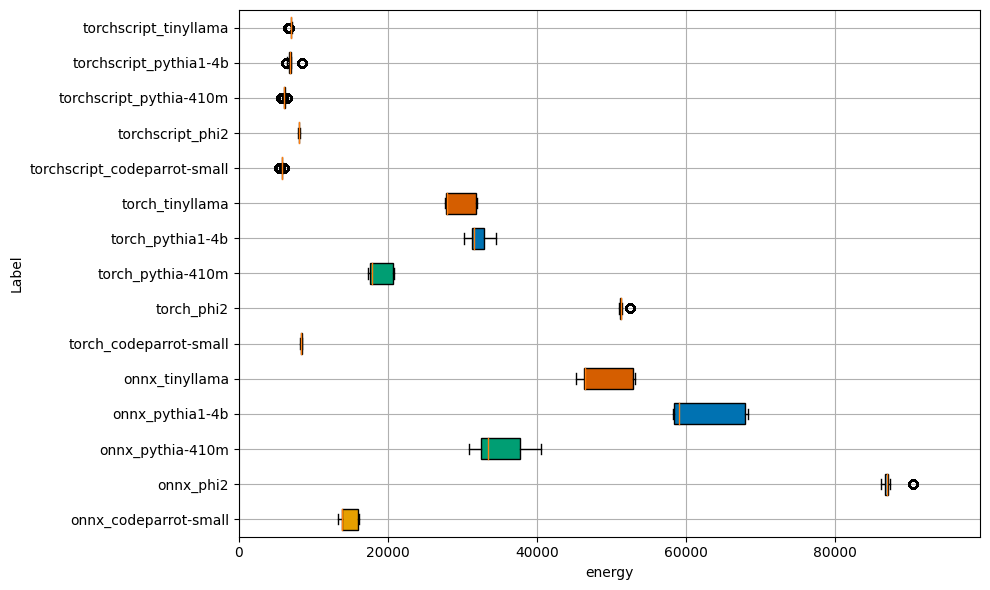

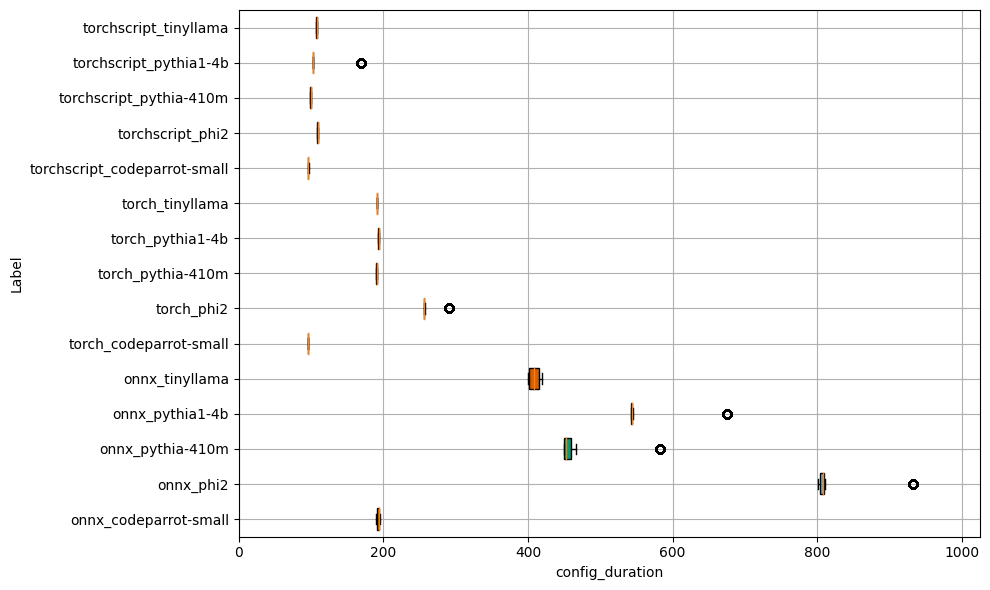

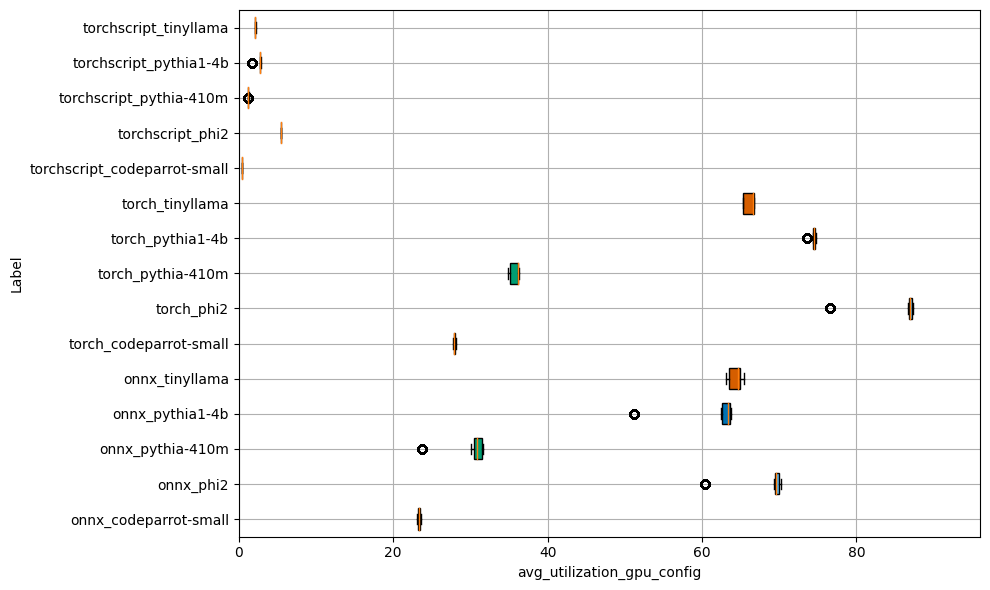

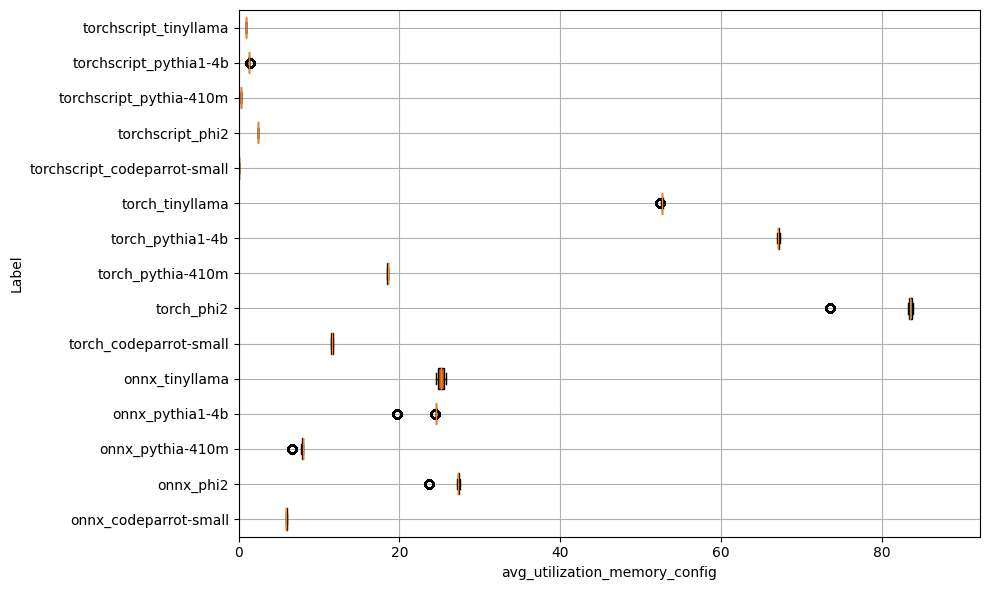

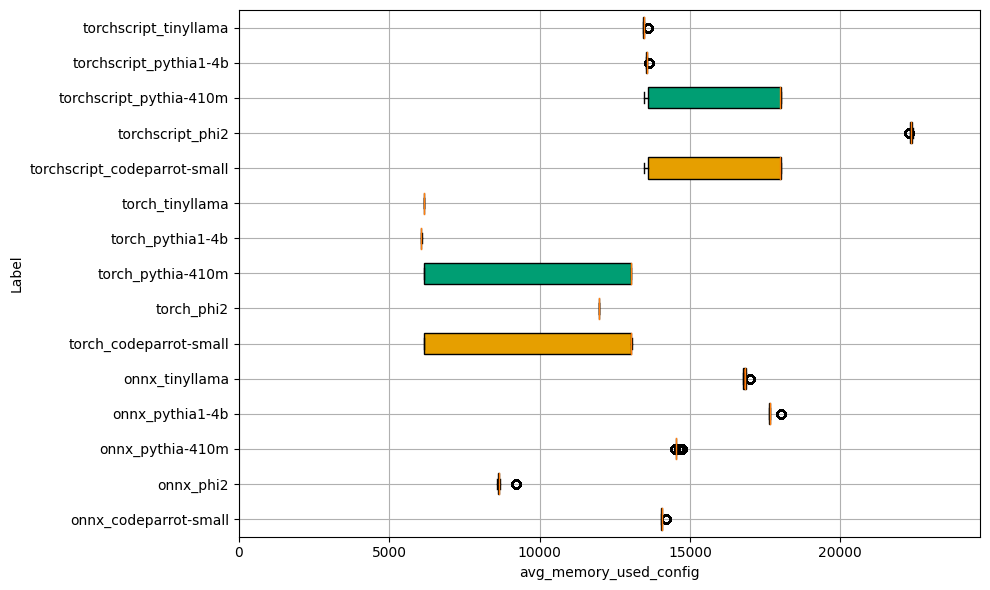

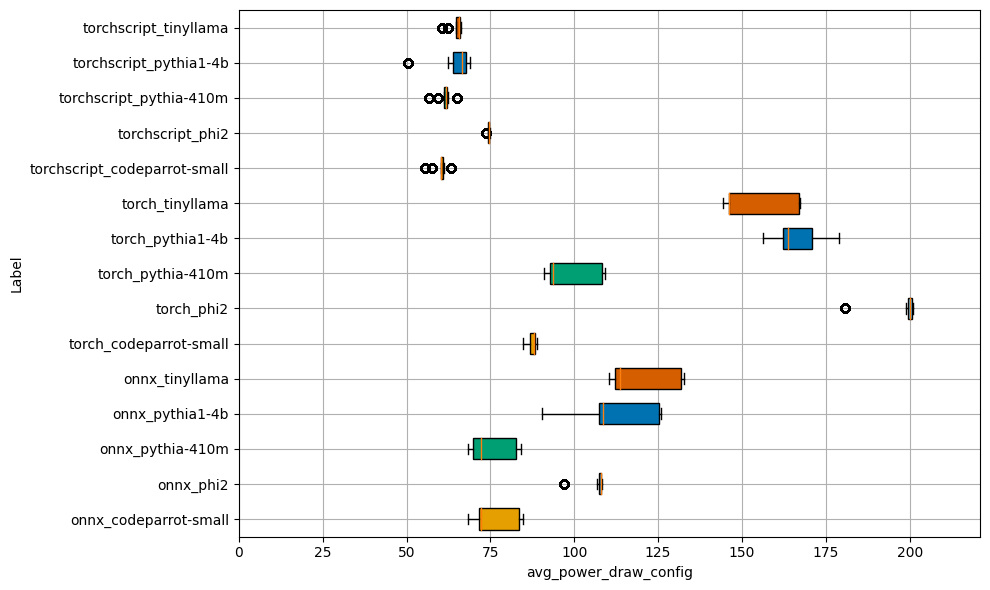

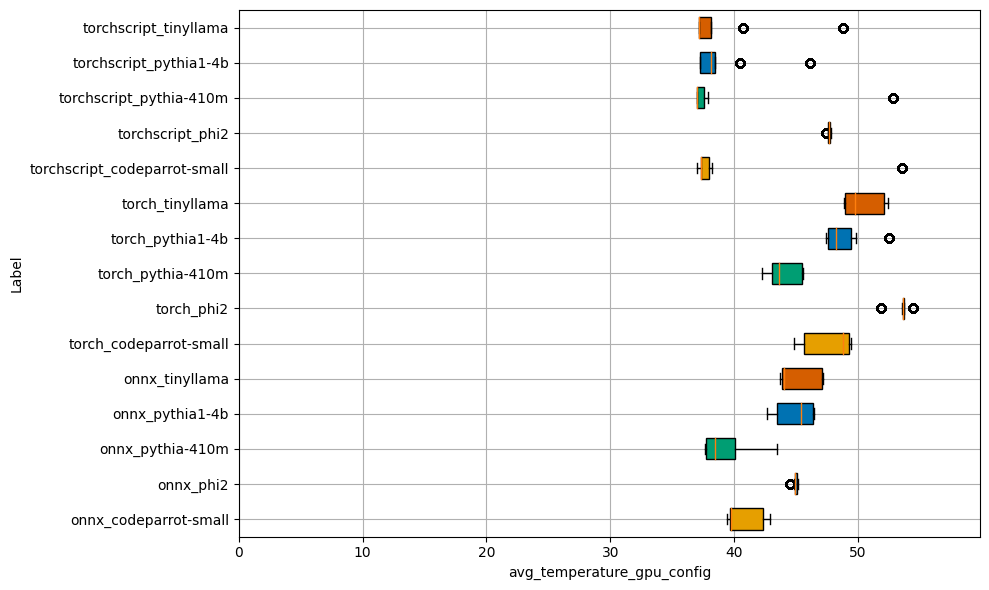

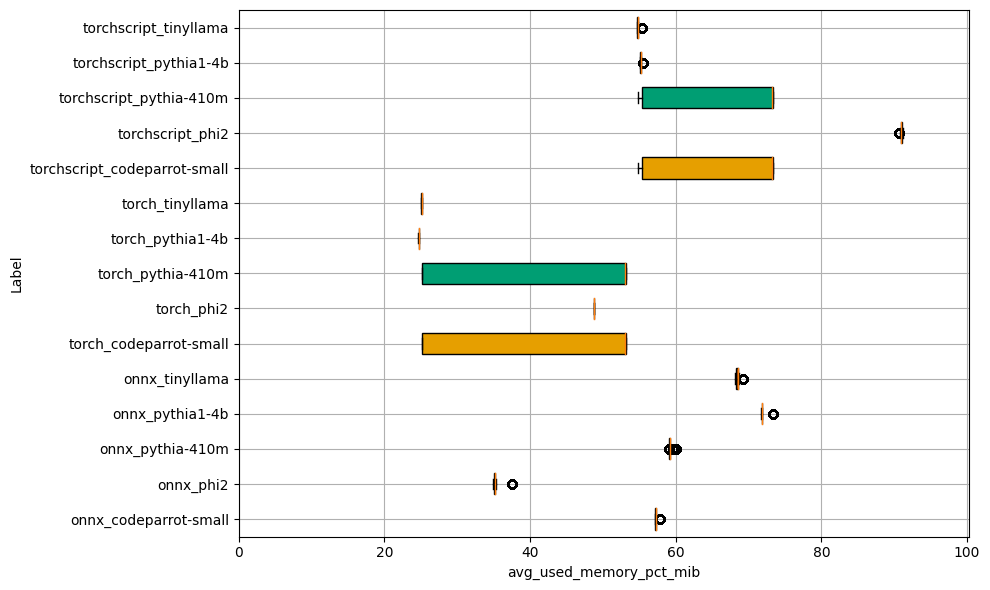

In [27]:

# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
colors = colors[:num_models]

# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

#variables_to_plot = ['energy','config_duration','avg_ utilization.gpu [%]','avg_ utilization.memory [%]','avg_ memory.used [MiB]' ,'avg_ temperature.gpu']
#variables_to_plot = ['Energy (Nvidia-smi) [J]','Execution time (Nvidia-smi) [s]','GPU usage (Nvidia-smi) [%]','Used memory (Nvidia-smi) [%]','Used GPU memory (Nvidia-smi) [MiB]' ,'GPU temperature (Nvidia-smi) [°]']
variables_to_plot = ['energy','config_duration','avg_utilization_gpu_config','avg_utilization_memory_config','avg_memory_used_config' ,
                     'avg_power_draw_config','avg_temperature_gpu_config','avg_used_memory_pct_mib']



n=0
# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label'
    grouped = nvidia_plot.groupby('label')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color

    # Customizing plot
    #plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')

    plt.xlim([0,nvidia_plot[variable].max()*1.1])
    plt.grid(True)
    
    plt.tight_layout()  # Adjust layout to make room for labels
    
    #plt.savefig(save_dir + "nvidia_"+variable)
    n+=1
plt.show()


### Wattmeter

In [28]:
# Path where the CSV files are stored
path = "D:/GAISSA/energy-repo/last_repo/june_gpu_test/"  # Adjust this path to your CSV files location
all_files_wattmeter = glob.glob(path + "/results_*/processed/wattmeter*_processed.csv")
all_files_wattmeter

['D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_1\\processed\\wattmeter_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_10\\processed\\wattmeter_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_2\\processed\\wattmeter_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_3\\processed\\wattmeter_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_4\\processed\\wattmeter_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_5\\processed\\wattmeter_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_6\\processed\\wattmeter_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_7\\processed\\wattmeter_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_8\\processed\\wattmeter_processed.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_9\\processed\\wattmeter_processed.csv']

In [29]:
result_numbers = []

li = []
for my_file in all_files_wattmeter:
    # The regex pattern to find "results_" followed by one or more digits
    df = pd.read_csv(my_file, index_col=None, header=0)
    
    match = re.search(r'results_(\d+)', my_file)
    if match:
        # Append the found number to the list
        result_numbers.append(int(match.group(1)))

    df['experiment'] = result_numbers[-1]
    li.append(df)

print(result_numbers)
# Combine all data into one DataFrame
wattmeter_df = pd.concat(li, axis=0, ignore_index=True)
wattmeter_df

[1, 10, 2, 3, 4, 5, 6, 7, 8, 9]


,time,runtime,model,Current,PowerFactor,Phase,Energy,EnergyNR,Load,label,energy_joules,energyNR_joules,energy_joules_config,energyNR_joules_config,avg_Current,avg_PowerFactor,avg_Phase,avg_Load,experiment
0,2024-06-08 21:47:02.854518,torch,pythia1-4b,717,1.00,336.26,120086,120086,174,torch_pythia1-4b,432309600,432309600,54000,54000,1278.477341,0.931662,343.706465,284.371601,1
1,2024-06-08 21:47:03.429127,torch,pythia1-4b,717,1.00,336.26,120086,120086,174,torch_pythia1-4b,432309600,432309600,54000,54000,1278.477341,0.931662,343.706465,284.371601,1
2,2024-06-08 21:47:04.017249,torch,pythia1-4b,812,0.91,335.38,120086,120086,176,torch_pythia1-4b,432309600,432309600,54000,54000,1278.477341,0.931662,343.706465,284.371601,1
3,2024-06-08 21:47:04.591239,torch,pythia1-4b,812,0.91,335.38,120086,120086,176,torch_pythia1-4b,432309600,432309600,54000,54000,1278.477341,0.931662,343.706465,284.371601,1
4,2024-06-08 21:47:05.163254,torch,pythia1-4b,812,0.91,335.38,120086,120086,176,torch_pythia1-4b,432309600,432309600,54000,54000,1278.477341,0.931662,343.706465,284.371601,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43816,2024-06-30 15:25:37.998872,torchscript,phi2,831,0.66,324.59,178428,178428,131,torchscript_phi2,642340800,642340800,14400,14400,764.350575,0.778851,326.560287,149.465517,9
43817,2024-06-30 15:25:38.575078,torchscript,phi2,831,0.66,324.59,178428,178428,131,torchscript_phi2,642340800,642340800,14400,14400,764.350575,0.778851,326.560287,149.465517,9
43818,2024-06-30 15:25:39.155122,torchscript,phi2,687,0.82,328.48,178428,178428,133,torchscript_phi2,642340800,642340800,14400,14400,764.350575,0.778851,326.560287,149.465517,9
43819,2024-06-30 15:25:39.743225,torchscript,phi2,687,0.82,328.48,178428,178428,133,torchscript_phi2,642340800,642340800,14400,14400,764.350575,0.778851,326.560287,149.465517,9


In [30]:

# ## add experiments number
# # List to hold data from each file
# li = []

# # Read each file and append to list
# n=1
# for filename in all_files_wattmeter:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     df['experiment'] = n
#     li.append(df)
#     n+=1
    

# # Combine all data into one DataFrame
# wattmeter_df = pd.concat(li, axis=0, ignore_index=True)
# wattmeter_df

In [31]:
wattmeter_df.columns

Index(['time', 'runtime', 'model', 'Current', 'PowerFactor', 'Phase', 'Energy',
       'EnergyNR', 'Load', 'label', 'energy_joules', 'energyNR_joules',
       'energy_joules_config', 'energyNR_joules_config', 'avg_Current',
       'avg_PowerFactor', 'avg_Phase', 'avg_Load', 'experiment'],
      dtype='object')

In [32]:
variables_to_plot = ['energy_joules_config', 'avg_Current', 'avg_PowerFactor', 'avg_Phase', 'avg_Load',]

In [33]:
#condition = wattmeter_df['label'].str.endswith('phi2')
#wattmeter_plot = remove_condition_rows( condition, wattmeter_df)
wattmeter_plot = wattmeter_df
wattmeter_plot

,time,runtime,model,Current,PowerFactor,Phase,Energy,EnergyNR,Load,label,energy_joules,energyNR_joules,energy_joules_config,energyNR_joules_config,avg_Current,avg_PowerFactor,avg_Phase,avg_Load,experiment
0,2024-06-08 21:47:02.854518,torch,pythia1-4b,717,1.00,336.26,120086,120086,174,torch_pythia1-4b,432309600,432309600,54000,54000,1278.477341,0.931662,343.706465,284.371601,1
1,2024-06-08 21:47:03.429127,torch,pythia1-4b,717,1.00,336.26,120086,120086,174,torch_pythia1-4b,432309600,432309600,54000,54000,1278.477341,0.931662,343.706465,284.371601,1
2,2024-06-08 21:47:04.017249,torch,pythia1-4b,812,0.91,335.38,120086,120086,176,torch_pythia1-4b,432309600,432309600,54000,54000,1278.477341,0.931662,343.706465,284.371601,1
3,2024-06-08 21:47:04.591239,torch,pythia1-4b,812,0.91,335.38,120086,120086,176,torch_pythia1-4b,432309600,432309600,54000,54000,1278.477341,0.931662,343.706465,284.371601,1
4,2024-06-08 21:47:05.163254,torch,pythia1-4b,812,0.91,335.38,120086,120086,176,torch_pythia1-4b,432309600,432309600,54000,54000,1278.477341,0.931662,343.706465,284.371601,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43816,2024-06-30 15:25:37.998872,torchscript,phi2,831,0.66,324.59,178428,178428,131,torchscript_phi2,642340800,642340800,14400,14400,764.350575,0.778851,326.560287,149.465517,9
43817,2024-06-30 15:25:38.575078,torchscript,phi2,831,0.66,324.59,178428,178428,131,torchscript_phi2,642340800,642340800,14400,14400,764.350575,0.778851,326.560287,149.465517,9
43818,2024-06-30 15:25:39.155122,torchscript,phi2,687,0.82,328.48,178428,178428,133,torchscript_phi2,642340800,642340800,14400,14400,764.350575,0.778851,326.560287,149.465517,9
43819,2024-06-30 15:25:39.743225,torchscript,phi2,687,0.82,328.48,178428,178428,133,torchscript_phi2,642340800,642340800,14400,14400,764.350575,0.778851,326.560287,149.465517,9


In [34]:
#condition = wattmeter_plot['label'].str.endswith('idle')

#wattmeter_plot = remove_condition_rows( condition, wattmeter_plot)
#wattmeter_plot


In [35]:

# wattmeter_plot.rename(columns={'energy_joules_config': 'Energy (Wattmeter) [J]'}, inplace=True)
# wattmeter_plot.rename(columns={'avg_Current': 'Current [mA]'}, inplace=True)
# wattmeter_plot.rename(columns={'avg_PowerFactor': 'Power Factor [-]'}, inplace=True)
# wattmeter_plot.rename(columns={'avg_Phase': 'Phase [°]'}, inplace=True)
# wattmeter_plot.rename(columns={'avg_Load': 'Load [W]'}, inplace=True)

# variables_to_plot = ['Energy (Wattmeter) [J]','Current [mA]','Power Factor [-]','Phase [°]' ,'Load [W]']


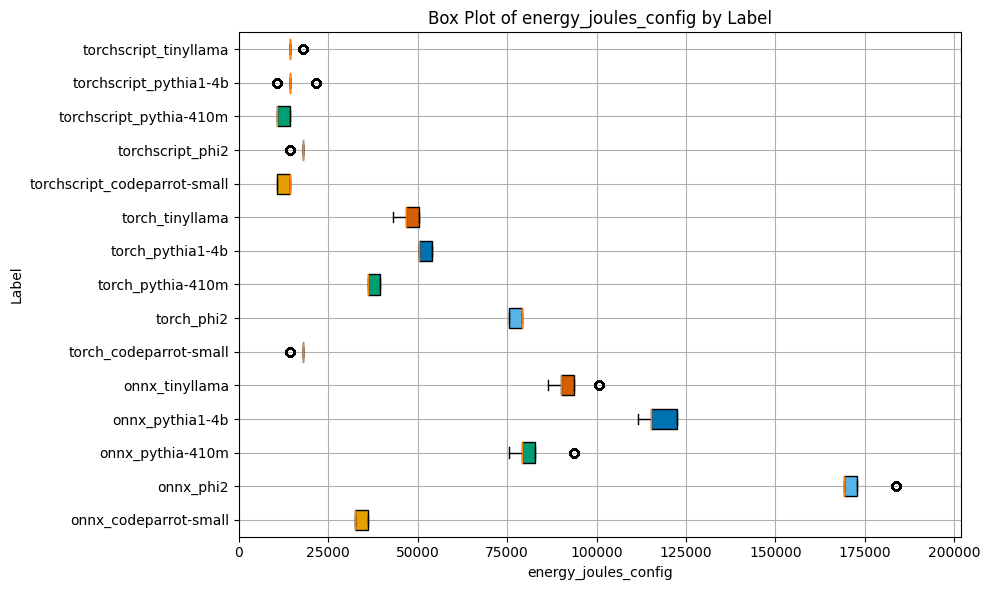

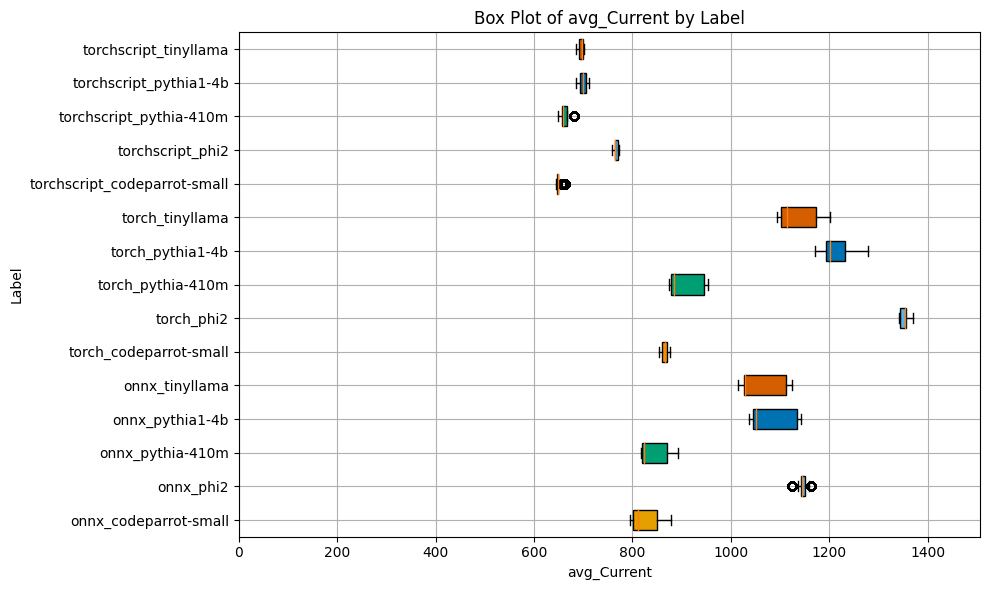

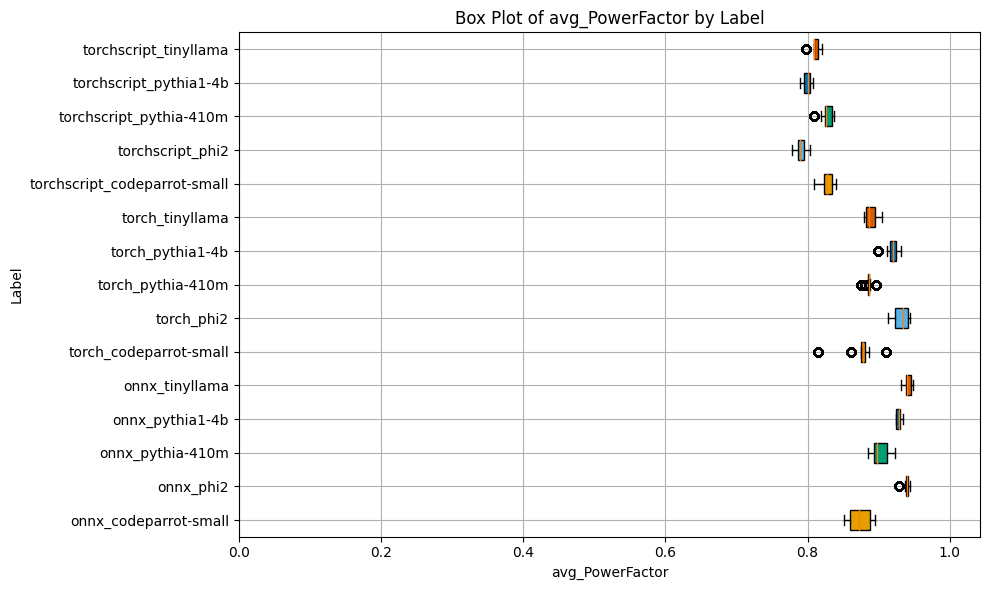

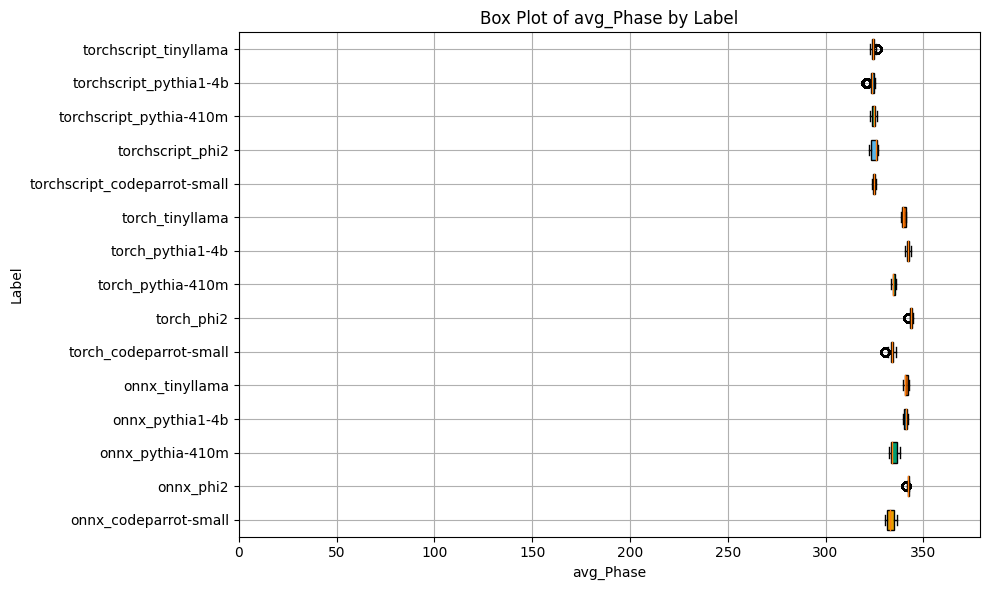

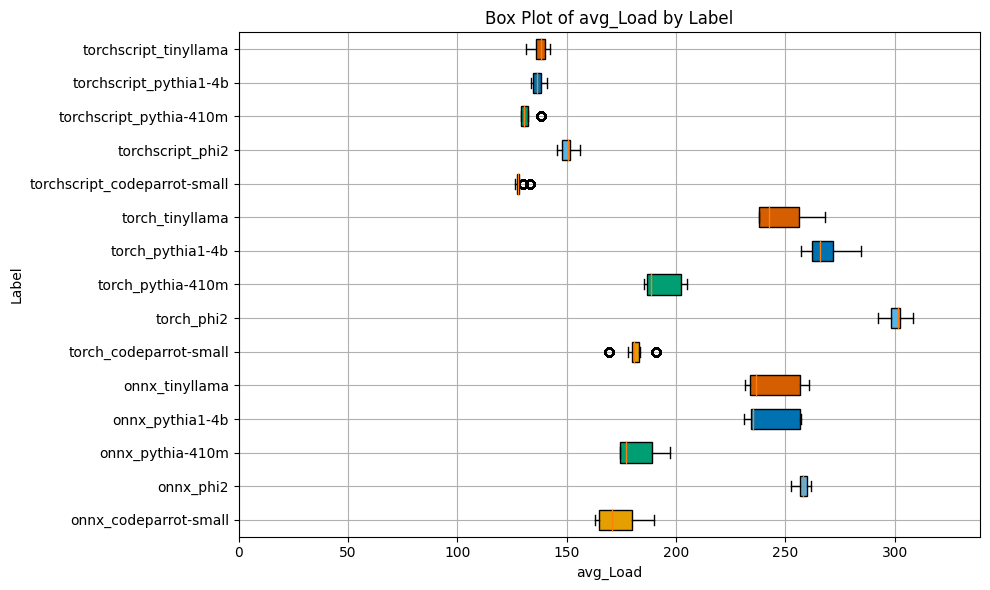

In [36]:
# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
colors = colors[:num_models]

# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

#variables_to_plot = ['Energy (Wattmeter) [J]','Current [mA]','Power Factor [-]','Phase [°]' ,'Load [W]']
variables_to_plot = ['energy_joules_config','avg_Current','avg_PowerFactor','avg_Phase' ,'avg_Load']



# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label'
    grouped = wattmeter_plot.groupby('label')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color

    # Customizing plot
    plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')
    plt.xlim([0,wattmeter_plot[variable].max()*1.1])
    plt.grid(True)
    
    plt.tight_layout()  # Adjust layout to make room for labels
    #plt.savefig(save_dir + "wattmeter_"+variable)

plt.show()


## RQ CPU energy + GPU energy

In [37]:
print(energi_df['energy'].max())
print(nvidia_df['energy'].max())
print(wattmeter_df['energy_joules_config'].max())


42967.30764770508
90475.23072791351
183600


### box plots

In [38]:
energi_df.columns

Index(['time', 'runtime', 'model', 'CPU_ENERGY (J)', 'TOTAL_MEMORY',
       'TOTAL_SWAP', 'USED_MEMORY', 'USED_SWAP', 'AVG_CPU_USAGE_SAMP', 'label',
       'avg_TOTAL_MEMORY', 'avg_TOTAL_SWAP', 'avg_USED_MEMORY',
       'avg_USED_SWAP', 'avg_cpu_usage_config', 'energy',
       'avg_used_memory_pct_config', 'experiment'],
      dtype='object')

In [39]:
energy_energi = energi_df[['runtime','model','label','energy','experiment']]
energy_energi

,runtime,model,label,energy,experiment
0,idle,idle,idle_idle,5356.125122,1
1,idle,idle,idle_idle,5356.125122,1
2,idle,idle,idle_idle,5356.125122,1
3,idle,idle,idle_idle,5356.125122,1
4,idle,idle,idle_idle,5356.125122,1
...,...,...,...,...,...
209647,torchscript,phi2,torchscript_phi2,2750.561356,9
209648,torchscript,phi2,torchscript_phi2,2750.561356,9
209649,torchscript,phi2,torchscript_phi2,2750.561356,9
209650,torchscript,phi2,torchscript_phi2,2750.561356,9


In [40]:
nvidia_df.columns

Index(['time', 'runtime', 'model', ' utilization.gpu [%]',
       ' utilization.memory [%]', ' memory.total [MiB]', ' memory.used [MiB]',
       ' power.draw [W]', ' power.max_limit [W]', ' temperature.gpu', 'label',
       'used_memory_pct_mib', 'avg_utilization_gpu_config',
       'avg_utilization_memory_config', 'avg_memory_used_config',
       'avg_power_draw_config', 'avg_temperature_gpu_config',
       'avg_used_memory_pct_mib', 'config_duration', 'energy', 'experiment'],
      dtype='object')

In [41]:
energy_nvidia = nvidia_df[['runtime','model','label','energy','experiment']]
energy_nvidia

,runtime,model,label,energy,experiment
0,torch,pythia1-4b,torch_pythia1-4b,34523.83530,1
1,torch,pythia1-4b,torch_pythia1-4b,34523.83530,1
2,torch,pythia1-4b,torch_pythia1-4b,34523.83530,1
3,torch,pythia1-4b,torch_pythia1-4b,34523.83530,1
4,torch,pythia1-4b,torch_pythia1-4b,34523.83530,1
...,...,...,...,...,...
386751,torchscript,phi2,torchscript_phi2,8109.20125,9
386752,torchscript,phi2,torchscript_phi2,8109.20125,9
386753,torchscript,phi2,torchscript_phi2,8109.20125,9
386754,torchscript,phi2,torchscript_phi2,8109.20125,9


In [42]:
cpu_aggregated = energy_energi.groupby(['label', 'experiment'])['energy'].mean().reset_index()
cpu_aggregated

,label,experiment,energy
0,idle_idle,1,5356.125122
1,idle_idle,2,5350.155334
2,idle_idle,3,5174.852402
3,idle_idle,4,5180.039169
4,idle_idle,5,5366.871078
...,...,...,...
155,torchscript_tinyllama,6,2479.216080
156,torchscript_tinyllama,7,2528.263107
157,torchscript_tinyllama,8,2645.645905
158,torchscript_tinyllama,9,2569.570862


In [43]:
gpu_aggregated = energy_nvidia.groupby(['label', 'experiment'])['energy'].mean().reset_index()
gpu_aggregated

,label,experiment,energy
0,onnx_codeparrot-small,1,15938.552931
1,onnx_codeparrot-small,2,13823.850824
2,onnx_codeparrot-small,3,13896.811929
3,onnx_codeparrot-small,4,16083.457295
4,onnx_codeparrot-small,5,13918.800235
...,...,...,...
145,torchscript_tinyllama,6,7022.551625
146,torchscript_tinyllama,7,7052.688061
147,torchscript_tinyllama,8,6716.034659
148,torchscript_tinyllama,9,7063.159418


In [44]:
# Merge the aggregated dataframes
merged_df = pd.merge(cpu_aggregated, gpu_aggregated, on=['label', 'experiment'], how='outer')
merged_df

,label,experiment,energy_x,energy_y
0,idle_idle,1,5356.125122,NaN
1,idle_idle,2,5350.155334,NaN
2,idle_idle,3,5174.852402,NaN
3,idle_idle,4,5180.039169,NaN
4,idle_idle,5,5366.871078,NaN
...,...,...,...,...
155,torchscript_tinyllama,6,2479.216080,7022.551625
156,torchscript_tinyllama,7,2528.263107,7052.688061
157,torchscript_tinyllama,8,2645.645905,6716.034659
158,torchscript_tinyllama,9,2569.570862,7063.159418


In [45]:
merged_df.fillna(0, inplace=True)
merged_df

,label,experiment,energy_x,energy_y
0,idle_idle,1,5356.125122,0.000000
1,idle_idle,2,5350.155334,0.000000
2,idle_idle,3,5174.852402,0.000000
3,idle_idle,4,5180.039169,0.000000
4,idle_idle,5,5366.871078,0.000000
...,...,...,...,...
155,torchscript_tinyllama,6,2479.216080,7022.551625
156,torchscript_tinyllama,7,2528.263107,7052.688061
157,torchscript_tinyllama,8,2645.645905,6716.034659
158,torchscript_tinyllama,9,2569.570862,7063.159418


In [46]:
#merged_df.loc[merged_df['label'] == 'idle_idle'] 

In [47]:

#merged_df.loc[merged_df['label'] == 'onnx_tinyllama'] 

In [48]:
path

'D:/GAISSA/energy-repo/last_repo/june_gpu_test/'

In [49]:
# merged_df.rename(columns={'energy_x': 'CPU energy (config) [J]'}, inplace=True)
# merged_df.rename(columns={'energy_y': 'GPU energy (config) [J]'}, inplace=True)
# merged_df['Total energy [J]'] = merged_df['CPU energy (config) [J]'] + merged_df['GPU energy (config) [J]'] 
merged_df.rename(columns={'energy_x': 'CPU_energy'}, inplace=True)
merged_df.rename(columns={'energy_y': 'GPU_energy'}, inplace=True)
merged_df['global_energy'] = merged_df['CPU_energy'] + merged_df['GPU_energy'] 
merged_df

,label,experiment,CPU_energy,GPU_energy,global_energy
0,idle_idle,1,5356.125122,0.000000,5356.125122
1,idle_idle,2,5350.155334,0.000000,5350.155334
2,idle_idle,3,5174.852402,0.000000,5174.852402
3,idle_idle,4,5180.039169,0.000000,5180.039169
4,idle_idle,5,5366.871078,0.000000,5366.871078
...,...,...,...,...,...
155,torchscript_tinyllama,6,2479.216080,7022.551625,9501.767705
156,torchscript_tinyllama,7,2528.263107,7052.688061,9580.951168
157,torchscript_tinyllama,8,2645.645905,6716.034659,9361.680564
158,torchscript_tinyllama,9,2569.570862,7063.159418,9632.730280


In [50]:
#condition = merged_df['label'].str.endswith('phi2')

#merged_df_plot = remove_condition_rows( condition, merged_df)
merged_df_plot = merged_df
merged_df

,label,experiment,CPU_energy,GPU_energy,global_energy
0,idle_idle,1,5356.125122,0.000000,5356.125122
1,idle_idle,2,5350.155334,0.000000,5350.155334
2,idle_idle,3,5174.852402,0.000000,5174.852402
3,idle_idle,4,5180.039169,0.000000,5180.039169
4,idle_idle,5,5366.871078,0.000000,5366.871078
...,...,...,...,...,...
155,torchscript_tinyllama,6,2479.216080,7022.551625,9501.767705
156,torchscript_tinyllama,7,2528.263107,7052.688061,9580.951168
157,torchscript_tinyllama,8,2645.645905,6716.034659,9361.680564
158,torchscript_tinyllama,9,2569.570862,7063.159418,9632.730280


In [51]:
print(tables_dir)
if SAVE_TABLES:
    merged_df_plot.to_csv(tables_dir+'final_energy_data.csv', index=False)

D:/GAISSA/energy-repo/last_repo/june_gpu_test/tables/


In [52]:
merged_df_plot

,label,experiment,CPU_energy,GPU_energy,global_energy
0,idle_idle,1,5356.125122,0.000000,5356.125122
1,idle_idle,2,5350.155334,0.000000,5350.155334
2,idle_idle,3,5174.852402,0.000000,5174.852402
3,idle_idle,4,5180.039169,0.000000,5180.039169
4,idle_idle,5,5366.871078,0.000000,5366.871078
...,...,...,...,...,...
155,torchscript_tinyllama,6,2479.216080,7022.551625,9501.767705
156,torchscript_tinyllama,7,2528.263107,7052.688061,9580.951168
157,torchscript_tinyllama,8,2645.645905,6716.034659,9361.680564
158,torchscript_tinyllama,9,2569.570862,7063.159418,9632.730280


In [53]:
# condition = merged_df_plot['label'] == 'idle_idle'
# merged_df_plot = merged_df_plot[~condition]
# merged_df_plot

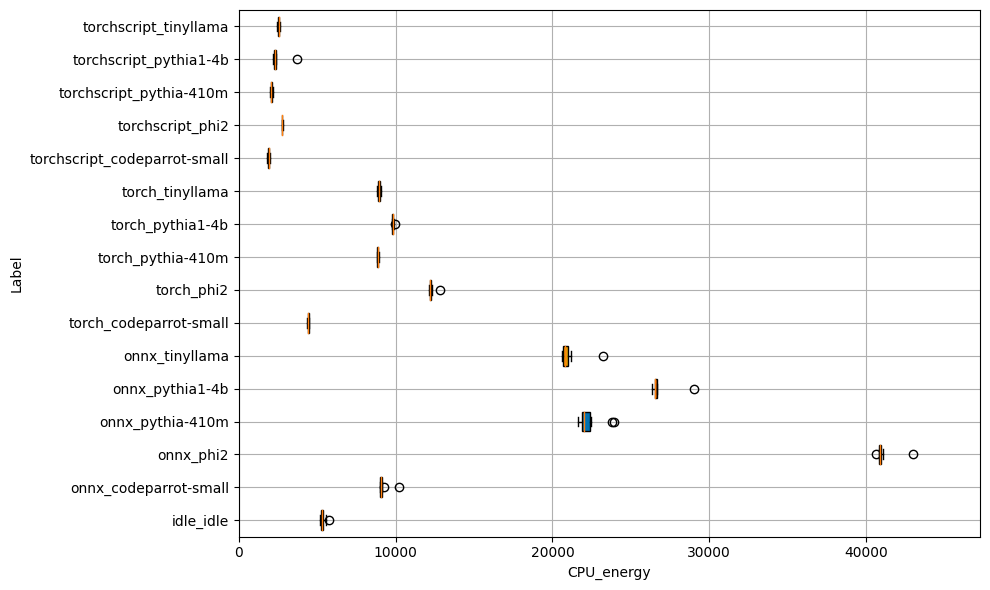

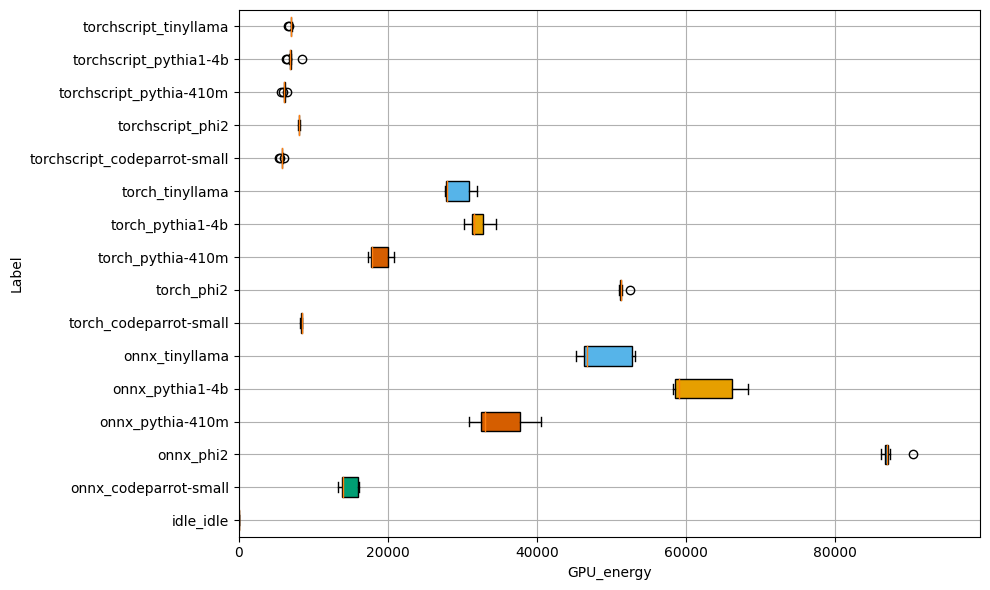

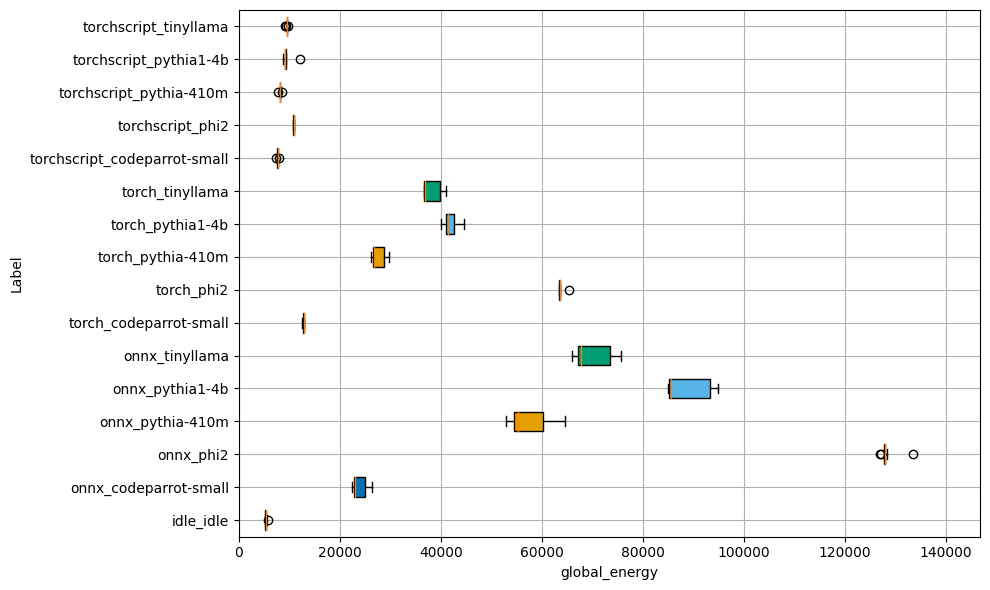

In [54]:

variables_to_plot = ['CPU_energy','GPU_energy','global_energy']
# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
colors = colors[:num_models]

# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

n=0
# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label'
    grouped = merged_df_plot.groupby('label')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color
        
        #median = np.median(group[variable].dropna())
        #print(name +" -> "+ str(median))

    # Customizing plot
    #plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')
    plt.xlim([0,merged_df_plot[variable].max()*1.1])
    plt.grid(True)
    
    plt.tight_layout()  # Adjust layout to make room for labels
    
    plt.savefig(save_dir + "energy_"+variable) if SAVE_FIGS else print(f"SAVE_FIGS:{SAVE_FIGS}")
    n+=1
plt.show()


### Median values of energy

In [55]:
# Calculate mean values for each label
df = merged_df_plot
median_energy_values = df.groupby('label').median()

# Optionally, you might want to reset the index if you need 'label' as a column
median_energy_values.reset_index(inplace=True)

#median_energy_values = median_energy_values.drop(columns = ['experiment'])
median_energy_values

,label,experiment,CPU_energy,GPU_energy,global_energy
0,idle_idle,5.5,5331.372978,0.000000,5331.372978
1,onnx_codeparrot-small,5.5,9081.845177,13986.934956,23077.985648
2,onnx_phi2,5.5,40885.409996,87022.120454,127932.914739
3,onnx_pythia-410m,5.5,21988.519135,33065.796229,55228.025927
4,onnx_pythia1-4b,5.5,26553.710274,59124.014519,85651.403900
5,onnx_tinyllama,5.5,20832.141495,46703.842778,67800.167767
6,torch_codeparrot-small,5.5,4424.862007,8426.396317,12825.179010
7,torch_phi2,5.5,12209.897324,51308.245523,63554.592497
8,torch_pythia-410m,5.5,8847.555695,17862.435892,26693.627340
9,torch_pythia1-4b,5.5,9833.124313,31640.409523,41433.656472


In [56]:
# Split the 'label' column into 'runtime' and 'model'
median_energy_values[['runtime', 'model']] = median_energy_values['label'].str.split('_', n=1, expand=True)
median_energy_values

,label,experiment,CPU_energy,GPU_energy,global_energy,runtime,model
0,idle_idle,5.5,5331.372978,0.000000,5331.372978,idle,idle
1,onnx_codeparrot-small,5.5,9081.845177,13986.934956,23077.985648,onnx,codeparrot-small
2,onnx_phi2,5.5,40885.409996,87022.120454,127932.914739,onnx,phi2
3,onnx_pythia-410m,5.5,21988.519135,33065.796229,55228.025927,onnx,pythia-410m
4,onnx_pythia1-4b,5.5,26553.710274,59124.014519,85651.403900,onnx,pythia1-4b
5,onnx_tinyllama,5.5,20832.141495,46703.842778,67800.167767,onnx,tinyllama
6,torch_codeparrot-small,5.5,4424.862007,8426.396317,12825.179010,torch,codeparrot-small
7,torch_phi2,5.5,12209.897324,51308.245523,63554.592497,torch,phi2
8,torch_pythia-410m,5.5,8847.555695,17862.435892,26693.627340,torch,pythia-410m
9,torch_pythia1-4b,5.5,9833.124313,31640.409523,41433.656472,torch,pythia1-4b


In [57]:
# Define the new order of the columns
#new_order = ['label', 'Used memory (Energibridge) [B]','CPU usage (Energibridge) [%]', 'runtime', 'model']
new_order= list(median_energy_values.columns[-2:]) + list(median_energy_values.columns[:-2])
# Reorder the columns by indexing in the new order
median_energy_values = median_energy_values[new_order]
median_energy_values

,runtime,model,label,experiment,CPU_energy,GPU_energy,global_energy
0,idle,idle,idle_idle,5.5,5331.372978,0.000000,5331.372978
1,onnx,codeparrot-small,onnx_codeparrot-small,5.5,9081.845177,13986.934956,23077.985648
2,onnx,phi2,onnx_phi2,5.5,40885.409996,87022.120454,127932.914739
3,onnx,pythia-410m,onnx_pythia-410m,5.5,21988.519135,33065.796229,55228.025927
4,onnx,pythia1-4b,onnx_pythia1-4b,5.5,26553.710274,59124.014519,85651.403900
5,onnx,tinyllama,onnx_tinyllama,5.5,20832.141495,46703.842778,67800.167767
6,torch,codeparrot-small,torch_codeparrot-small,5.5,4424.862007,8426.396317,12825.179010
7,torch,phi2,torch_phi2,5.5,12209.897324,51308.245523,63554.592497
8,torch,pythia-410m,torch_pythia-410m,5.5,8847.555695,17862.435892,26693.627340
9,torch,pythia1-4b,torch_pythia1-4b,5.5,9833.124313,31640.409523,41433.656472


In [58]:
if SAVE_TABLES:
    median_energy_values.to_csv(tables_dir+'median_energy_values.csv', index=False)

In [59]:
median_energy_values = median_energy_values.drop(columns = ['label','experiment'])


In [60]:
median_energy_values

,runtime,model,CPU_energy,GPU_energy,global_energy
0,idle,idle,5331.372978,0.000000,5331.372978
1,onnx,codeparrot-small,9081.845177,13986.934956,23077.985648
2,onnx,phi2,40885.409996,87022.120454,127932.914739
3,onnx,pythia-410m,21988.519135,33065.796229,55228.025927
4,onnx,pythia1-4b,26553.710274,59124.014519,85651.403900
5,onnx,tinyllama,20832.141495,46703.842778,67800.167767
6,torch,codeparrot-small,4424.862007,8426.396317,12825.179010
7,torch,phi2,12209.897324,51308.245523,63554.592497
8,torch,pythia-410m,8847.555695,17862.435892,26693.627340
9,torch,pythia1-4b,9833.124313,31640.409523,41433.656472


In [61]:
filename = tables_dir + 'median_energy_values.tex'
save_latex_table(median_energy_values,filename)

\begin{tabular}{llrrr}
\toprule
runtime & model & CPU energy & GPU energy & global energy \\
\midrule
idle & idle & 5331.372978 & 0.000000 & 5331.372978 \\
onnx & codeparrot-small & 9081.845177 & 13986.934956 & 23077.985648 \\
onnx & phi2 & 40885.409996 & 87022.120454 & 127932.914739 \\
onnx & pythia-410m & 21988.519135 & 33065.796229 & 55228.025927 \\
onnx & pythia1-4b & 26553.710274 & 59124.014519 & 85651.403900 \\
onnx & tinyllama & 20832.141495 & 46703.842778 & 67800.167767 \\
torch & codeparrot-small & 4424.862007 & 8426.396317 & 12825.179010 \\
torch & phi2 & 12209.897324 & 51308.245523 & 63554.592497 \\
torch & pythia-410m & 8847.555695 & 17862.435892 & 26693.627340 \\
torch & pythia1-4b & 9833.124313 & 31640.409523 & 41433.656472 \\
torch & tinyllama & 8958.797241 & 27899.111313 & 36827.716835 \\
torchscript & codeparrot-small & 1900.725342 & 5820.772408 & 7706.116044 \\
torchscript & phi2 & 2762.991547 & 8107.966712 & 10862.803397 \\
torchscript & pythia-410m & 2052.937462 & 6

In [62]:
# # Convert DataFrame to LaTeX table
# latex_table = median_energy_values.to_latex(index=False)

# # Define the filename
#filename = tables_dir + 'median_energy_values.tex'

# # Open the file in write mode
# with open(filename, 'w') as file:
#     file.write(latex_table)
    
# # Print LaTeX table
# print(latex_table)

### Mean values of energy

In [63]:
# Calculate mean values for each label
df = merged_df_plot
mean_values = df.groupby('label').mean()

# Optionally, you might want to reset the index if you need 'label' as a column
mean_values.reset_index(inplace=True)

mean_values = mean_values.drop(columns = ['experiment'])
mean_values

,label,CPU_energy,GPU_energy,global_energy
0,idle_idle,5354.569939,0.000000,5354.569939
1,onnx_codeparrot-small,9194.086356,14631.469502,23825.555858
2,onnx_phi2,41094.609500,87246.974272,128341.583772
3,onnx_pythia-410m,22350.111249,34808.775192,57158.886441
4,onnx_pythia1-4b,26786.079912,61798.101714,88584.181626
5,onnx_tinyllama,21072.893358,48866.637895,69939.531253
6,torch_codeparrot-small,4422.490605,8369.469636,12791.960241
7,torch_phi2,12279.055205,51410.968027,63690.023231
8,torch_pythia-410m,8855.930324,18604.837062,27460.767386
9,torch_pythia1-4b,9832.710625,32161.237077,41993.947702


In [64]:
pwd

'D:\\GAISSA\\energy-repo\\last_repo\\energy-ml-serving\\experiments_add_new'

In [65]:
# Split the 'label' column into 'runtime' and 'model'
mean_values[['runtime', 'model']] = mean_values['label'].str.split('_', n=1, expand=True)
#df[['runtime', 'model']] = df['label'].str.split('_', n=1, expand=True)
mean_values

,label,CPU_energy,GPU_energy,global_energy,runtime,model
0,idle_idle,5354.569939,0.000000,5354.569939,idle,idle
1,onnx_codeparrot-small,9194.086356,14631.469502,23825.555858,onnx,codeparrot-small
2,onnx_phi2,41094.609500,87246.974272,128341.583772,onnx,phi2
3,onnx_pythia-410m,22350.111249,34808.775192,57158.886441,onnx,pythia-410m
4,onnx_pythia1-4b,26786.079912,61798.101714,88584.181626,onnx,pythia1-4b
5,onnx_tinyllama,21072.893358,48866.637895,69939.531253,onnx,tinyllama
6,torch_codeparrot-small,4422.490605,8369.469636,12791.960241,torch,codeparrot-small
7,torch_phi2,12279.055205,51410.968027,63690.023231,torch,phi2
8,torch_pythia-410m,8855.930324,18604.837062,27460.767386,torch,pythia-410m
9,torch_pythia1-4b,9832.710625,32161.237077,41993.947702,torch,pythia1-4b


In [66]:
if SAVE_TABLES:
    mean_values.to_csv(tables_dir+'mean_values_by_label.csv', index=False)

In [67]:
mean_values = mean_values.drop(columns = ['label'])
mean_values

,CPU_energy,GPU_energy,global_energy,runtime,model
0,5354.569939,0.000000,5354.569939,idle,idle
1,9194.086356,14631.469502,23825.555858,onnx,codeparrot-small
2,41094.609500,87246.974272,128341.583772,onnx,phi2
3,22350.111249,34808.775192,57158.886441,onnx,pythia-410m
4,26786.079912,61798.101714,88584.181626,onnx,pythia1-4b
5,21072.893358,48866.637895,69939.531253,onnx,tinyllama
6,4422.490605,8369.469636,12791.960241,torch,codeparrot-small
7,12279.055205,51410.968027,63690.023231,torch,phi2
8,8855.930324,18604.837062,27460.767386,torch,pythia-410m
9,9832.710625,32161.237077,41993.947702,torch,pythia1-4b


In [68]:
filename = tables_dir + 'mean_energy_values.tex'
save_latex_table(mean_values,filename)

\begin{tabular}{rrrll}
\toprule
CPU energy & GPU energy & global energy & runtime & model \\
\midrule
5354.569939 & 0.000000 & 5354.569939 & idle & idle \\
9194.086356 & 14631.469502 & 23825.555858 & onnx & codeparrot-small \\
41094.609500 & 87246.974272 & 128341.583772 & onnx & phi2 \\
22350.111249 & 34808.775192 & 57158.886441 & onnx & pythia-410m \\
26786.079912 & 61798.101714 & 88584.181626 & onnx & pythia1-4b \\
21072.893358 & 48866.637895 & 69939.531253 & onnx & tinyllama \\
4422.490605 & 8369.469636 & 12791.960241 & torch & codeparrot-small \\
12279.055205 & 51410.968027 & 63690.023231 & torch & phi2 \\
8855.930324 & 18604.837062 & 27460.767386 & torch & pythia-410m \\
9832.710625 & 32161.237077 & 41993.947702 & torch & pythia1-4b \\
8952.919618 & 29059.657966 & 38012.577585 & torch & tinyllama \\
1907.680121 & 5779.068408 & 7686.748529 & torchscript & codeparrot-small \\
2766.541321 & 8098.972311 & 10865.513632 & torchscript & phi2 \\
2088.411020 & 6085.970089 & 8174.381109 & t

In [69]:

# # Convert DataFrame to LaTeX table
# latex_table = mean_values.to_latex(index=False)

# # Define the filename
# filename = tables_dir + 'mean_energy_values.tex'

# # Open the file in write mode
# with open(filename, 'w') as file:
#     file.write(latex_table)
    
# # Print LaTeX table
# print(latex_table)

# RQ1.2

## Resource utilization: Energibridge: CPU usage, Used memory

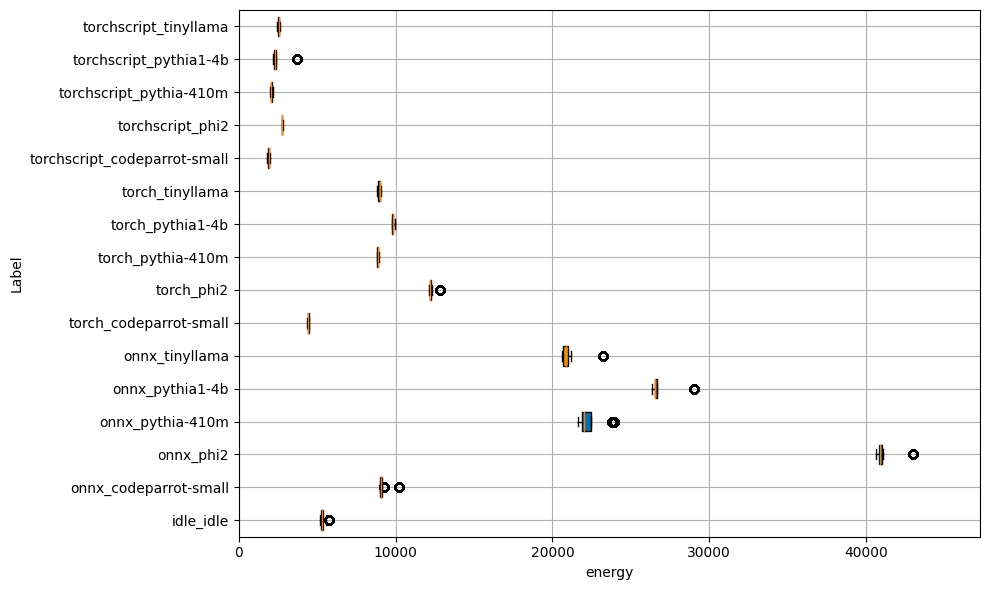

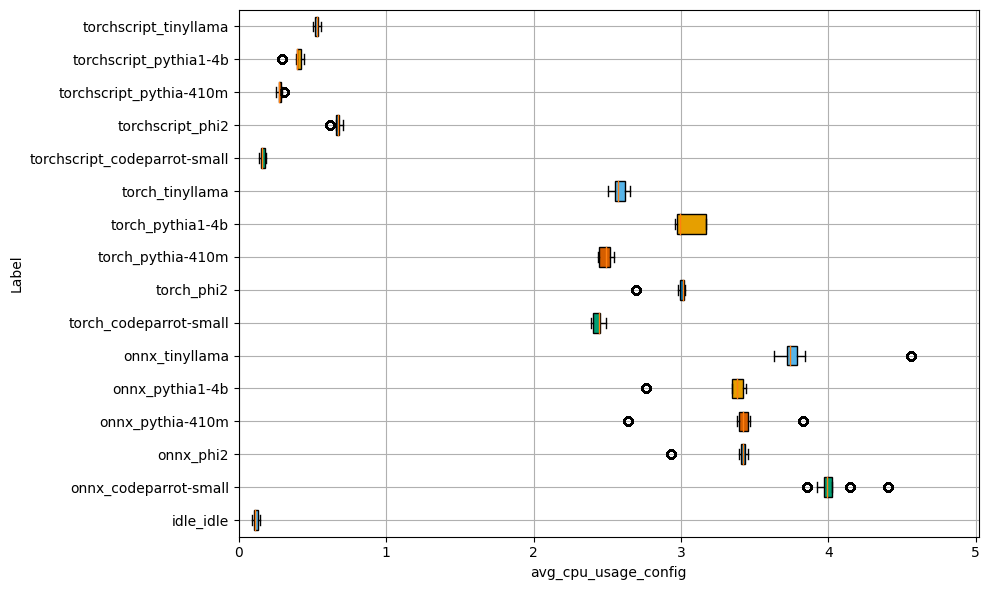

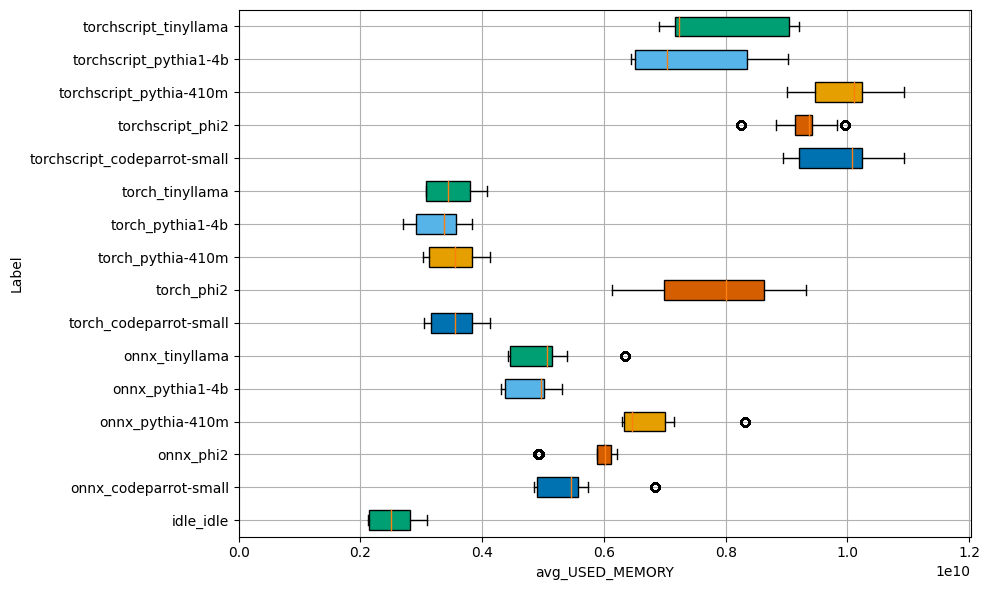

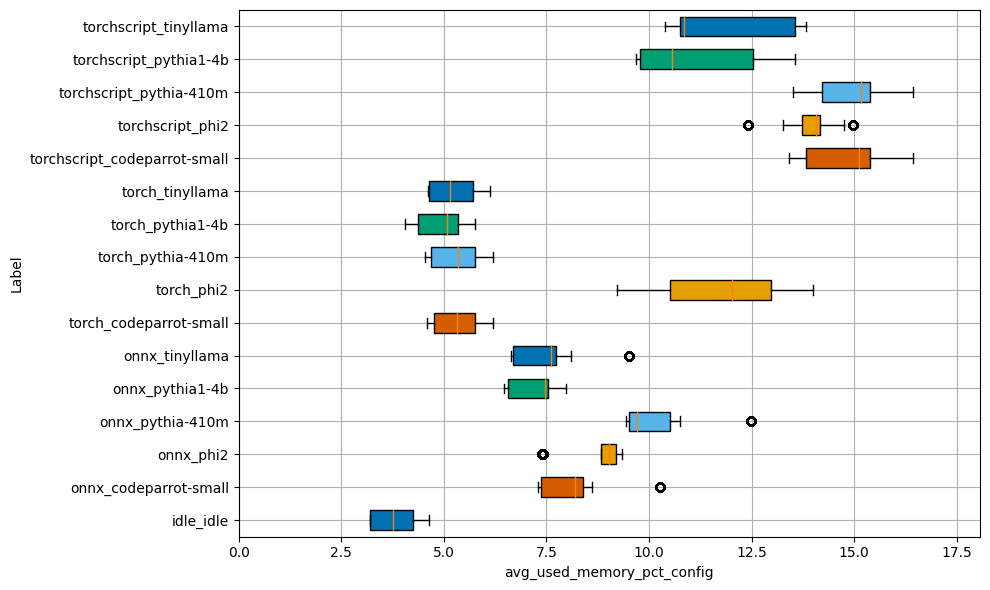

In [70]:

#variables_to_plot = [ 'Energy (Energibridge) [J]', "CPU usage (Energibridge) [%]",  'Used memory (Energibridge) [B]',]

variables_to_plot = [ 'energy', "avg_cpu_usage_config",  'avg_USED_MEMORY','avg_used_memory_pct_config']

# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
colors = colors[:num_models]
# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label' : runtime_model
    grouped = energi_plot.groupby('label')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color

    # Customizing plot
    #plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.xlim([0,energi_plot[variable].max()*1.1])
    
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to make room for labels
    plt.savefig(save_dir+"energi_"+variable) if SAVE_FIGS else print(f"SAVE_FIGS:{SAVE_FIGS}")

plt.show()


In [71]:
energi_plot.head()

,time,runtime,model,CPU_ENERGY (J),TOTAL_MEMORY,TOTAL_SWAP,USED_MEMORY,USED_SWAP,AVG_CPU_USAGE_SAMP,label,avg_TOTAL_MEMORY,avg_TOTAL_SWAP,avg_USED_MEMORY,avg_USED_SWAP,avg_cpu_usage_config,energy,avg_used_memory_pct_config,experiment
0,2024-06-08 21:42:00.400,idle,idle,516616.142639,66575933440,2147479552,2241388544,0,5.237742,idle_idle,6.657593e+10,2.147480e+09,2.794639e+09,0.0,0.143838,5356.125122,4.197672,1
1,2024-06-08 21:42:00.400,idle,idle,516616.207123,66575933440,2147479552,2246549504,0,5.237742,idle_idle,6.657593e+10,2.147480e+09,2.794639e+09,0.0,0.143838,5356.125122,4.197672,1
2,2024-06-08 21:42:00.600,idle,idle,516627.494354,66575933440,2147479552,2353451008,0,4.872685,idle_idle,6.657593e+10,2.147480e+09,2.794639e+09,0.0,0.143838,5356.125122,4.197672,1
3,2024-06-08 21:42:00.800,idle,idle,516639.257111,66575933440,2147479552,2402861056,0,4.872685,idle_idle,6.657593e+10,2.147480e+09,2.794639e+09,0.0,0.143838,5356.125122,4.197672,1
4,2024-06-08 21:42:01.000,idle,idle,516651.727112,66575933440,2147479552,2452594688,0,6.209758,idle_idle,6.657593e+10,2.147480e+09,2.794639e+09,0.0,0.143838,5356.125122,4.197672,1


In [72]:
#variables_to_plot = [ 'energy', "avg_cpu_usage_config",  'avg_USED_MEMORY','avg_used_memory_pct_config']

resource_energi = energi_plot[['label','experiment',"avg_cpu_usage_config",  'avg_USED_MEMORY','avg_used_memory_pct_config']]

resource_energi

,label,experiment,avg_cpu_usage_config,avg_USED_MEMORY,avg_used_memory_pct_config
0,idle_idle,1,0.143838,2.794639e+09,4.197672
1,idle_idle,1,0.143838,2.794639e+09,4.197672
2,idle_idle,1,0.143838,2.794639e+09,4.197672
3,idle_idle,1,0.143838,2.794639e+09,4.197672
4,idle_idle,1,0.143838,2.794639e+09,4.197672
...,...,...,...,...,...
209647,torchscript_phi2,9,0.658563,8.255906e+09,12.400737
209648,torchscript_phi2,9,0.658563,8.255906e+09,12.400737
209649,torchscript_phi2,9,0.658563,8.255906e+09,12.400737
209650,torchscript_phi2,9,0.658563,8.255906e+09,12.400737


In [73]:

resource_energi.to_csv(tables_dir+'final_energibridge_data.csv', index=False) if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")


### CPU usage and Used memory 

In [74]:

resource_energi = resource_energi.drop(columns = ['experiment'])

In [75]:
# Calculate mean values for each label
df = resource_energi
median_resource_energi = df.groupby('label').median()

# Optionally, you might want to reset the index if you need 'label' as a column
median_resource_energi.reset_index(inplace=True)

#median_energy_values = median_energy_values.drop(columns = ['experiment'])
median_resource_energi

,label,avg_cpu_usage_config,avg_USED_MEMORY,avg_used_memory_pct_config
0,idle_idle,0.110316,2.495251e+09,3.747977
1,onnx_codeparrot-small,3.991848,5.463905e+09,8.207026
2,onnx_phi2,3.418926,6.012355e+09,9.030823
3,onnx_pythia-410m,3.422415,6.463005e+09,9.707720
4,onnx_pythia1-4b,3.379086,4.971254e+09,7.467044
5,onnx_tinyllama,3.736836,5.061456e+09,7.602531
6,torch_codeparrot-small,2.443924,3.546823e+09,5.327485
7,torch_phi2,3.013264,8.007964e+09,12.028316
8,torch_pythia-410m,2.491036,3.558276e+09,5.344688
9,torch_pythia1-4b,2.993023,3.378596e+09,5.074801


In [76]:
# Split the 'label' column into 'runtime' and 'model'
median_resource_energi[['runtime', 'model']] = median_resource_energi['label'].str.split('_', n=1, expand=True)
median_resource_energi

,label,avg_cpu_usage_config,avg_USED_MEMORY,avg_used_memory_pct_config,runtime,model
0,idle_idle,0.110316,2.495251e+09,3.747977,idle,idle
1,onnx_codeparrot-small,3.991848,5.463905e+09,8.207026,onnx,codeparrot-small
2,onnx_phi2,3.418926,6.012355e+09,9.030823,onnx,phi2
3,onnx_pythia-410m,3.422415,6.463005e+09,9.707720,onnx,pythia-410m
4,onnx_pythia1-4b,3.379086,4.971254e+09,7.467044,onnx,pythia1-4b
5,onnx_tinyllama,3.736836,5.061456e+09,7.602531,onnx,tinyllama
6,torch_codeparrot-small,2.443924,3.546823e+09,5.327485,torch,codeparrot-small
7,torch_phi2,3.013264,8.007964e+09,12.028316,torch,phi2
8,torch_pythia-410m,2.491036,3.558276e+09,5.344688,torch,pythia-410m
9,torch_pythia1-4b,2.993023,3.378596e+09,5.074801,torch,pythia1-4b


In [77]:
# Define the new order of the columns
#new_order = ['label', 'Used memory (Energibridge) [B]','CPU usage (Energibridge) [%]', 'runtime', 'model']
new_order= list(median_resource_energi.columns[-2:]) + list(median_resource_energi.columns[:-2])
# Reorder the columns by indexing in the new order
median_resource_energi = median_resource_energi[new_order]
median_resource_energi

,runtime,model,label,avg_cpu_usage_config,avg_USED_MEMORY,avg_used_memory_pct_config
0,idle,idle,idle_idle,0.110316,2.495251e+09,3.747977
1,onnx,codeparrot-small,onnx_codeparrot-small,3.991848,5.463905e+09,8.207026
2,onnx,phi2,onnx_phi2,3.418926,6.012355e+09,9.030823
3,onnx,pythia-410m,onnx_pythia-410m,3.422415,6.463005e+09,9.707720
4,onnx,pythia1-4b,onnx_pythia1-4b,3.379086,4.971254e+09,7.467044
5,onnx,tinyllama,onnx_tinyllama,3.736836,5.061456e+09,7.602531
6,torch,codeparrot-small,torch_codeparrot-small,2.443924,3.546823e+09,5.327485
7,torch,phi2,torch_phi2,3.013264,8.007964e+09,12.028316
8,torch,pythia-410m,torch_pythia-410m,2.491036,3.558276e+09,5.344688
9,torch,pythia1-4b,torch_pythia1-4b,2.993023,3.378596e+09,5.074801


In [78]:
if SAVE_TABLES:
    median_resource_energi.to_csv(tables_dir+'median_resource_energi.csv', index=False)

In [79]:
median_resource_energi = median_resource_energi.drop(columns = ['label'])


In [80]:
filename = tables_dir + 'median_resource_energi.tex'
save_latex_table(median_resource_energi,filename)

\begin{tabular}{llrrr}
\toprule
runtime & model & avg cpu usage config & avg USED MEMORY & avg used memory pct config \\
\midrule
idle & idle & 0.110316 & 2495250711.893333 & 3.747977 \\
onnx & codeparrot-small & 3.991848 & 5463905331.674562 & 8.207026 \\
onnx & phi2 & 3.418926 & 6012354783.289591 & 9.030823 \\
onnx & pythia-410m & 3.422415 & 6463005466.982005 & 9.707720 \\
onnx & pythia1-4b & 3.379086 & 4971254377.737481 & 7.467044 \\
onnx & tinyllama & 3.736836 & 5061455913.057756 & 7.602531 \\
torch & codeparrot-small & 2.443924 & 3546822779.476091 & 5.327485 \\
torch & phi2 & 3.013264 & 8007963916.969603 & 12.028316 \\
torch & pythia-410m & 2.491036 & 3558275711.731656 & 5.344688 \\
torch & pythia1-4b & 2.993023 & 3378595890.881988 & 5.074801 \\
torch & tinyllama & 2.573948 & 3432273235.903665 & 5.155426 \\
torchscript & codeparrot-small & 0.158259 & 10067923251.200001 & 15.122467 \\
torchscript & phi2 & 0.672850 & 9375467047.384617 & 14.082367 \\
torchscript & pythia-410m & 0.2757

In [81]:
# # Convert DataFrame to LaTeX table
# latex_table = median_resource_energi.to_latex(index=False)

# # Define the filename
# filename = tables_dir + 'median_resource_energi.tex'

# # Open the file in write mode
# with open(filename, 'w') as file:
#     file.write(latex_table)


# # Print LaTeX table
# print(latex_table)

## Resource utilization: Nvidia: 

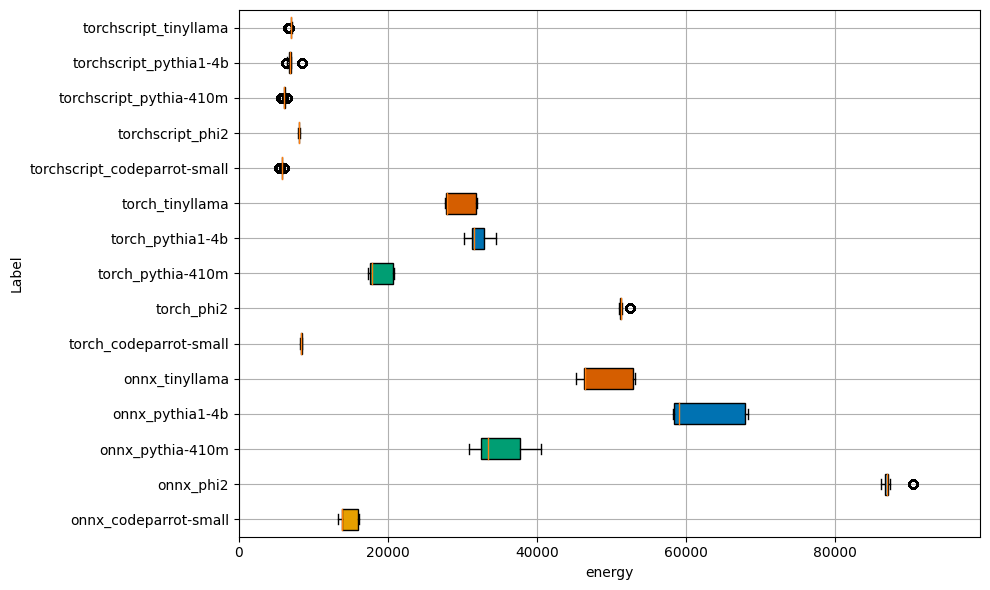

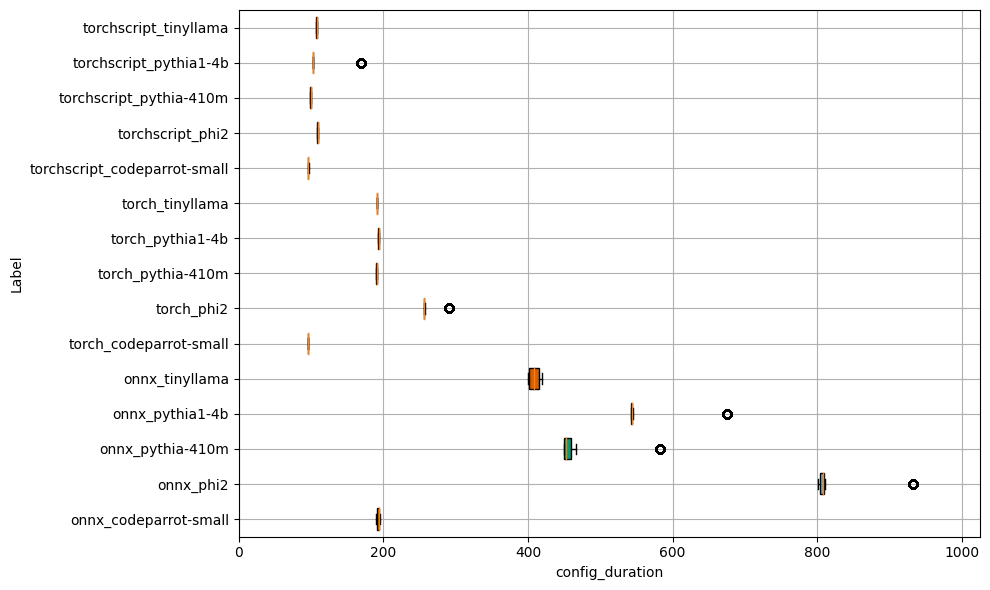

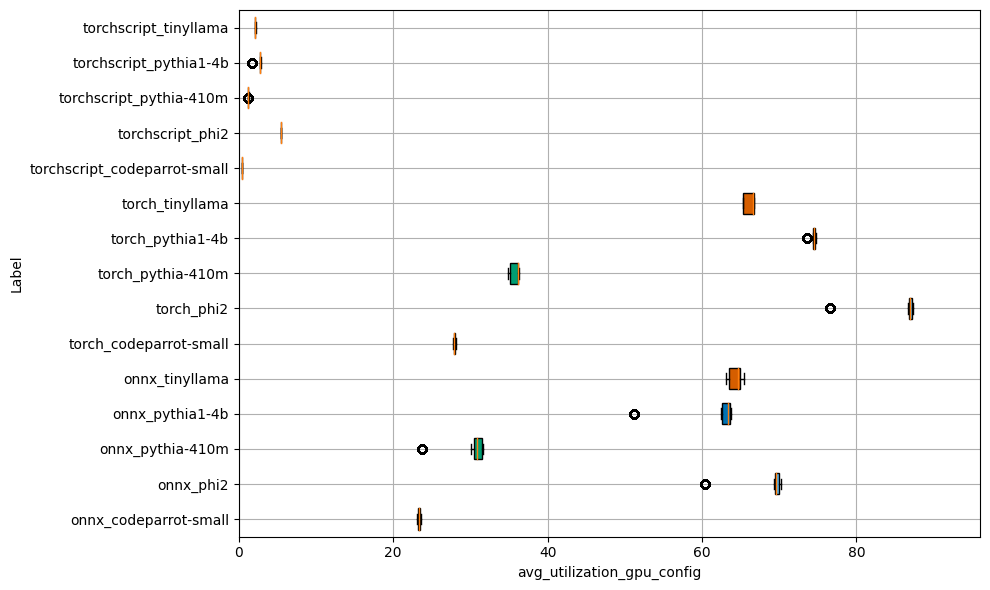

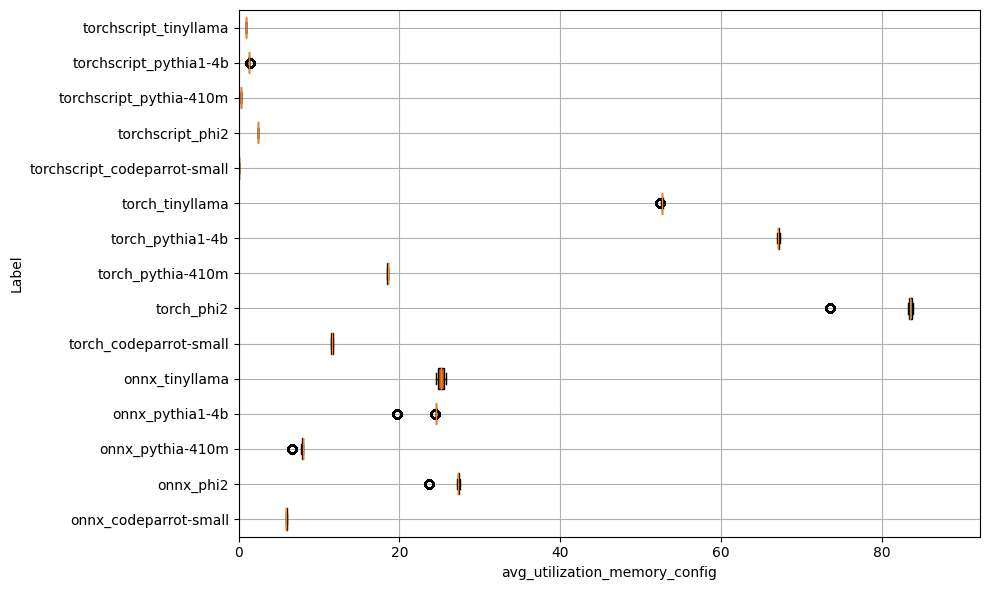

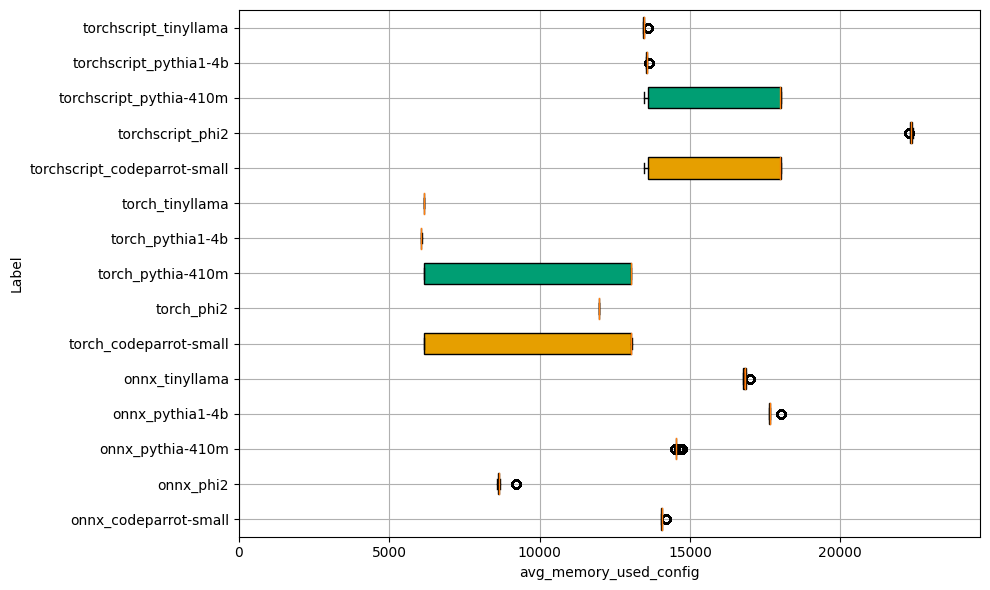

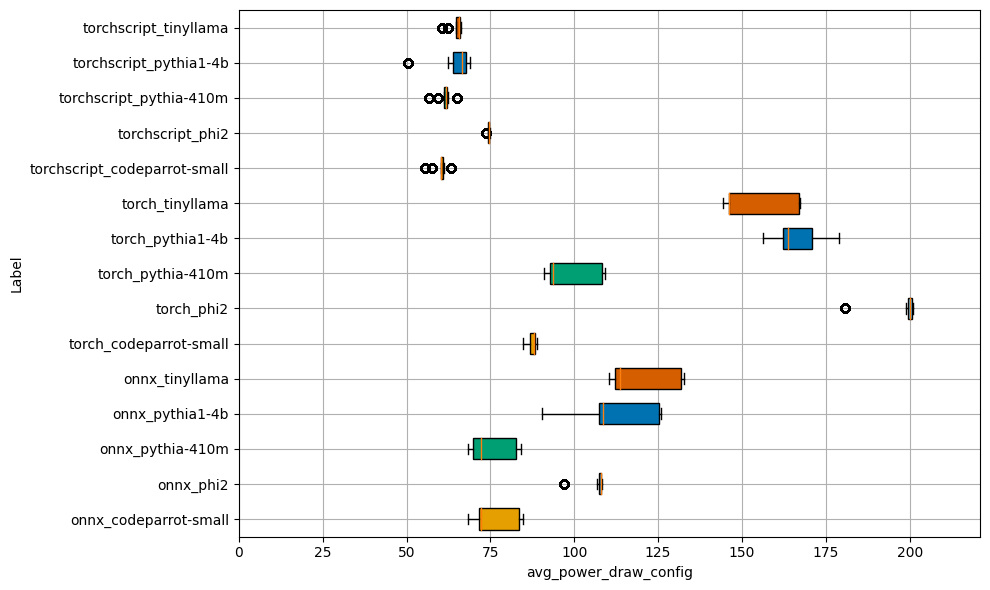

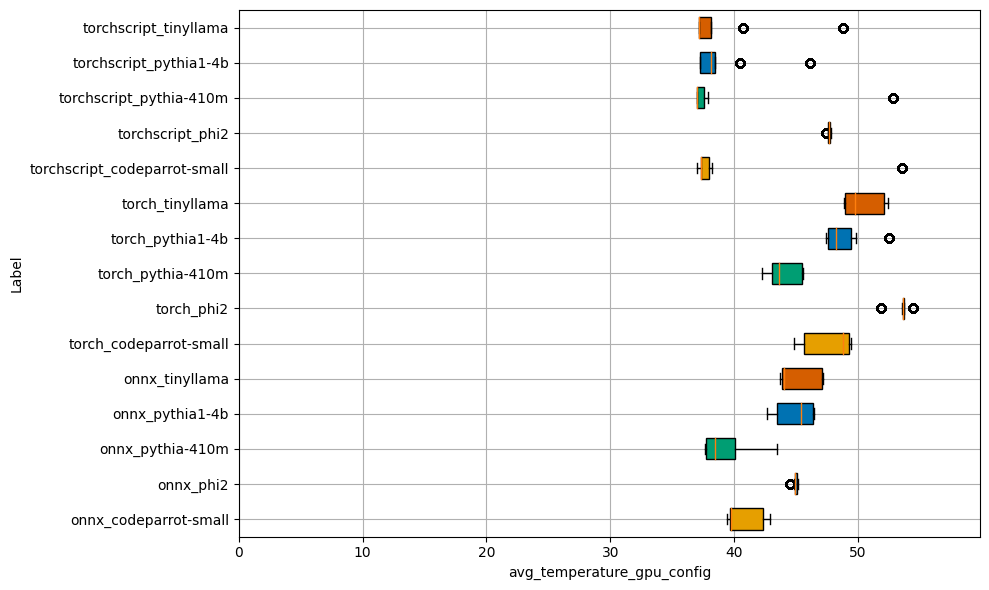

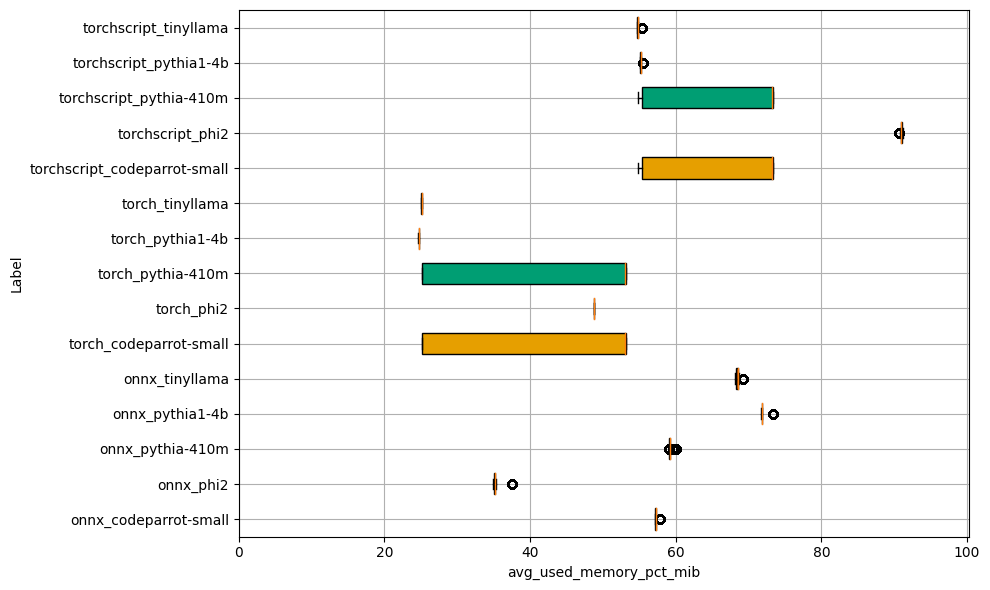

In [82]:
variables_to_plot = ['Energy (Nvidia-smi) [J]','Execution time (Nvidia-smi) [s]','GPU usage (Nvidia-smi) [%]',
                     'Used memory (Nvidia-smi) [%]','Used GPU memory (Nvidia-smi) [MiB]' ,'GPU temperature (Nvidia-smi) [°]']

variables_to_plot = ['energy','config_duration','avg_utilization_gpu_config','avg_utilization_memory_config','avg_memory_used_config' ,
                     'avg_power_draw_config','avg_temperature_gpu_config','avg_used_memory_pct_mib']


# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
colors = colors[:num_models]

# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

n=0
# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label'
    grouped = nvidia_plot.groupby('label')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color

    # Customizing plot
    #plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')

    plt.xlim([0,nvidia_plot[variable].max()*1.1])
    plt.grid(True)
    
    plt.tight_layout()  # Adjust layout to make room for labels
    
    plt.savefig(save_dir + "nvidia_"+variable) if SAVE_FIGS else print(f"SAVE_FIGS:{SAVE_FIGS}") if SAVE_FIGS else print(f"SAVE_FIGS:{SAVE_FIGS}")
    n+=1
plt.show()


In [83]:
nvidia_plot.columns

Index(['time', 'runtime', 'model', ' utilization.gpu [%]',
       ' utilization.memory [%]', ' memory.total [MiB]', ' memory.used [MiB]',
       ' power.draw [W]', ' power.max_limit [W]', ' temperature.gpu', 'label',
       'used_memory_pct_mib', 'avg_utilization_gpu_config',
       'avg_utilization_memory_config', 'avg_memory_used_config',
       'avg_power_draw_config', 'avg_temperature_gpu_config',
       'avg_used_memory_pct_mib', 'config_duration', 'energy', 'experiment'],
      dtype='object')

In [84]:
resource_nvidia = nvidia_plot[['label', 'experiment','config_duration','avg_utilization_gpu_config','avg_utilization_memory_config','avg_memory_used_config' ,
                     'avg_power_draw_config','avg_temperature_gpu_config','avg_used_memory_pct_mib']]
#variables_to_plot = ['Energy (Nvidia-smi) [J]','Execution time (Nvidia-smi) [s]','GPU usage (Nvidia-smi) [%]','Used memory (Nvidia-smi) [%]','Used GPU memory (Nvidia-smi) [MiB]' ,'GPU temperature (Nvidia-smi) [°]']
#variables_to_plot = ['energy','config_duration','avg_utilization_gpu_config','avg_utilization_memory_config','avg_memory_used_config' ,
#                     'avg_power_draw_config','avg_temperature_gpu_config','avg_used_memory_pct_mib']
resource_nvidia

,label,experiment,config_duration,avg_utilization_gpu_config,avg_utilization_memory_config,avg_memory_used_config,avg_power_draw_config,avg_temperature_gpu_config,avg_used_memory_pct_mib
0,torch_pythia1-4b,1,193.242,73.584680,67.165711,6061.018760,178.655961,49.400730,24.674397
1,torch_pythia1-4b,1,193.242,73.584680,67.165711,6061.018760,178.655961,49.400730,24.674397
2,torch_pythia1-4b,1,193.242,73.584680,67.165711,6061.018760,178.655961,49.400730,24.674397
3,torch_pythia1-4b,1,193.242,73.584680,67.165711,6061.018760,178.655961,49.400730,24.674397
4,torch_pythia1-4b,1,193.242,73.584680,67.165711,6061.018760,178.655961,49.400730,24.674397
...,...,...,...,...,...,...,...,...,...
386751,torchscript_phi2,9,108.929,5.487037,2.398148,22328.531481,74.444833,47.714815,90.899412
386752,torchscript_phi2,9,108.929,5.487037,2.398148,22328.531481,74.444833,47.714815,90.899412
386753,torchscript_phi2,9,108.929,5.487037,2.398148,22328.531481,74.444833,47.714815,90.899412
386754,torchscript_phi2,9,108.929,5.487037,2.398148,22328.531481,74.444833,47.714815,90.899412


In [85]:
resource_nvidia['label'].unique()

array(['torch_pythia1-4b', 'torch_tinyllama', 'torch_codeparrot-small',
       'torch_pythia-410m', 'onnx_pythia1-4b', 'onnx_tinyllama',
       'onnx_codeparrot-small', 'onnx_pythia-410m',
       'torchscript_pythia1-4b', 'torchscript_tinyllama',
       'torchscript_codeparrot-small', 'torchscript_pythia-410m',
       'onnx_phi2', 'torch_phi2', 'torchscript_phi2'], dtype=object)

In [86]:

resource_nvidia.to_csv(tables_dir+'final_nvidia_data.csv', index=False) if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")

In [87]:

resource_nvidia = resource_nvidia.drop(columns = ['experiment'])


In [88]:
# Calculate mean values for each label
df = resource_nvidia
median_resource_nvidia = df.groupby('label').median()

# Optionally, you might want to reset the index if you need 'label' as a column
median_resource_nvidia.reset_index(inplace=True)

#median_energy_values = median_energy_values.drop(columns = ['experiment'])
median_resource_nvidia

,label,config_duration,avg_utilization_gpu_config,avg_utilization_memory_config,avg_memory_used_config,avg_power_draw_config,avg_temperature_gpu_config,avg_used_memory_pct_mib
0,onnx_codeparrot-small,193.248,23.285492,5.922396,14060.011458,72.095349,39.756477,57.238281
1,onnx_phi2,807.433,69.566101,27.315231,8635.174006,107.844958,44.880774,35.153778
2,onnx_pythia-410m,452.766,30.861945,7.972371,14532.744818,72.103135,38.453184,59.162778
3,onnx_pythia1-4b,543.585,63.327115,24.518106,17653.619505,108.593907,45.403583,71.867853
4,onnx_tinyllama,408.373,64.615539,25.207245,16832.976408,113.557743,43.995546,68.527017
5,torch_codeparrot-small,95.886,27.906118,11.542887,13038.983122,87.979239,48.785939,53.081677
6,torch_phi2,256.109,86.951613,83.567270,11975.102804,200.063659,53.620134,48.750622
7,torch_pythia-410m,190.790,36.117865,18.539112,13039.000000,93.805735,43.592827,53.081746
8,torch_pythia1-4b,193.226,74.532744,67.165711,6071.998438,163.751597,48.241164,24.719095
9,torch_tinyllama,191.016,66.558777,52.640148,6169.000000,146.283056,49.748152,25.113988


In [89]:
# Split the 'label' column into 'runtime' and 'model'
median_resource_nvidia[['runtime', 'model']] = median_resource_nvidia['label'].str.split('_', n=1, expand=True)
median_resource_nvidia

,label,config_duration,avg_utilization_gpu_config,avg_utilization_memory_config,avg_memory_used_config,avg_power_draw_config,avg_temperature_gpu_config,avg_used_memory_pct_mib,runtime,model
0,onnx_codeparrot-small,193.248,23.285492,5.922396,14060.011458,72.095349,39.756477,57.238281,onnx,codeparrot-small
1,onnx_phi2,807.433,69.566101,27.315231,8635.174006,107.844958,44.880774,35.153778,onnx,phi2
2,onnx_pythia-410m,452.766,30.861945,7.972371,14532.744818,72.103135,38.453184,59.162778,onnx,pythia-410m
3,onnx_pythia1-4b,543.585,63.327115,24.518106,17653.619505,108.593907,45.403583,71.867853,onnx,pythia1-4b
4,onnx_tinyllama,408.373,64.615539,25.207245,16832.976408,113.557743,43.995546,68.527017,onnx,tinyllama
5,torch_codeparrot-small,95.886,27.906118,11.542887,13038.983122,87.979239,48.785939,53.081677,torch,codeparrot-small
6,torch_phi2,256.109,86.951613,83.567270,11975.102804,200.063659,53.620134,48.750622,torch,phi2
7,torch_pythia-410m,190.790,36.117865,18.539112,13039.000000,93.805735,43.592827,53.081746,torch,pythia-410m
8,torch_pythia1-4b,193.226,74.532744,67.165711,6071.998438,163.751597,48.241164,24.719095,torch,pythia1-4b
9,torch_tinyllama,191.016,66.558777,52.640148,6169.000000,146.283056,49.748152,25.113988,torch,tinyllama


In [90]:
# Define the new order of the columns
#new_order = ['label', 'Used memory (Energibridge) [B]','CPU usage (Energibridge) [%]', 'runtime', 'model']
new_order= list(median_resource_nvidia.columns[-2:]) + list(median_resource_nvidia.columns[:-2])
# Reorder the columns by indexing in the new order
median_resource_nvidia = median_resource_nvidia[new_order]
median_resource_nvidia

,runtime,model,label,config_duration,avg_utilization_gpu_config,avg_utilization_memory_config,avg_memory_used_config,avg_power_draw_config,avg_temperature_gpu_config,avg_used_memory_pct_mib
0,onnx,codeparrot-small,onnx_codeparrot-small,193.248,23.285492,5.922396,14060.011458,72.095349,39.756477,57.238281
1,onnx,phi2,onnx_phi2,807.433,69.566101,27.315231,8635.174006,107.844958,44.880774,35.153778
2,onnx,pythia-410m,onnx_pythia-410m,452.766,30.861945,7.972371,14532.744818,72.103135,38.453184,59.162778
3,onnx,pythia1-4b,onnx_pythia1-4b,543.585,63.327115,24.518106,17653.619505,108.593907,45.403583,71.867853
4,onnx,tinyllama,onnx_tinyllama,408.373,64.615539,25.207245,16832.976408,113.557743,43.995546,68.527017
5,torch,codeparrot-small,torch_codeparrot-small,95.886,27.906118,11.542887,13038.983122,87.979239,48.785939,53.081677
6,torch,phi2,torch_phi2,256.109,86.951613,83.567270,11975.102804,200.063659,53.620134,48.750622
7,torch,pythia-410m,torch_pythia-410m,190.790,36.117865,18.539112,13039.000000,93.805735,43.592827,53.081746
8,torch,pythia1-4b,torch_pythia1-4b,193.226,74.532744,67.165711,6071.998438,163.751597,48.241164,24.719095
9,torch,tinyllama,torch_tinyllama,191.016,66.558777,52.640148,6169.000000,146.283056,49.748152,25.113988


In [91]:
if SAVE_TABLES:
    median_resource_nvidia.to_csv(tables_dir+'median_resource_nvidia.csv', index=False)


In [92]:
median_resource_nvidia = median_resource_nvidia.drop(columns = ['label'])


In [93]:
filename = tables_dir + 'median_resource_nvidia.tex'
save_latex_table(median_resource_nvidia,filename)

\begin{tabular}{llrrrrrrr}
\toprule
runtime & model & config duration & avg utilization gpu config & avg utilization memory config & avg memory used config & avg power draw config & avg temperature gpu config & avg used memory pct mib \\
\midrule
onnx & codeparrot-small & 193.248000 & 23.285492 & 5.922396 & 14060.011458 & 72.095349 & 39.756477 & 57.238281 \\
onnx & phi2 & 807.433000 & 69.566101 & 27.315231 & 8635.174006 & 107.844958 & 44.880774 & 35.153778 \\
onnx & pythia-410m & 452.766000 & 30.861945 & 7.972371 & 14532.744818 & 72.103135 & 38.453184 & 59.162778 \\
onnx & pythia1-4b & 543.585000 & 63.327115 & 24.518106 & 17653.619505 & 108.593907 & 45.403583 & 71.867853 \\
onnx & tinyllama & 408.373000 & 64.615539 & 25.207245 & 16832.976408 & 113.557743 & 43.995546 & 68.527017 \\
torch & codeparrot-small & 95.886000 & 27.906118 & 11.542887 & 13038.983122 & 87.979239 & 48.785939 & 53.081677 \\
torch & phi2 & 256.109000 & 86.951613 & 83.567270 & 11975.102804 & 200.063659 & 53.620134 & 4

In [94]:
# # Convert DataFrame to LaTeX table
# latex_table = median_resource_nvidia.to_latex(index=False)

# # Define the filename
# filename = tables_dir + 'median_resource_nvidia.tex'

# # Open the file in write mode
# with open(filename, 'w') as file:
#     file.write(latex_table)

# # Print LaTeX table
# print(latex_table)

## Other: Wattmeter: 'Current [mA]','Power Factor [-]','Phase [°]' ,'Load [W]'

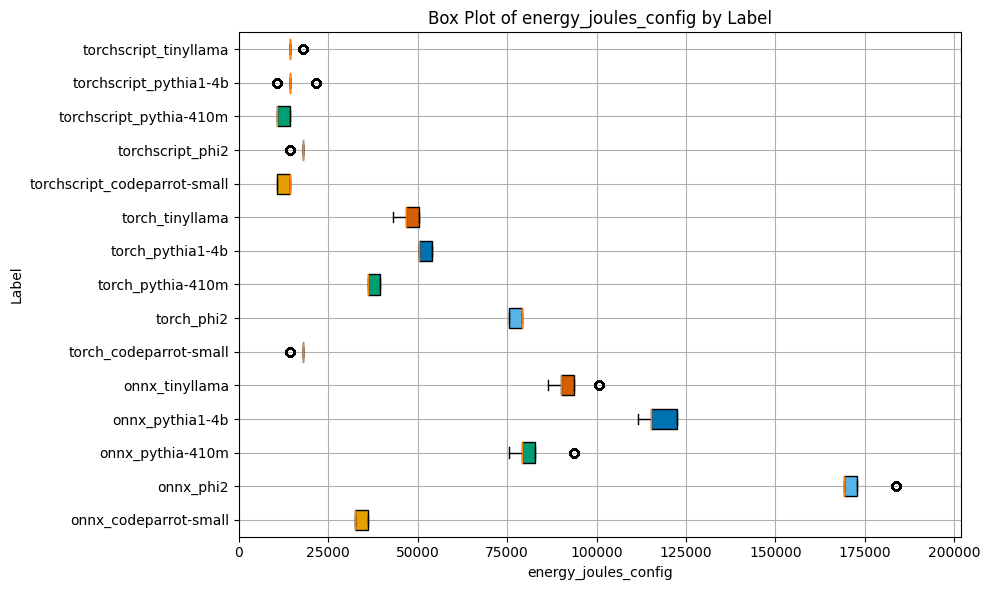

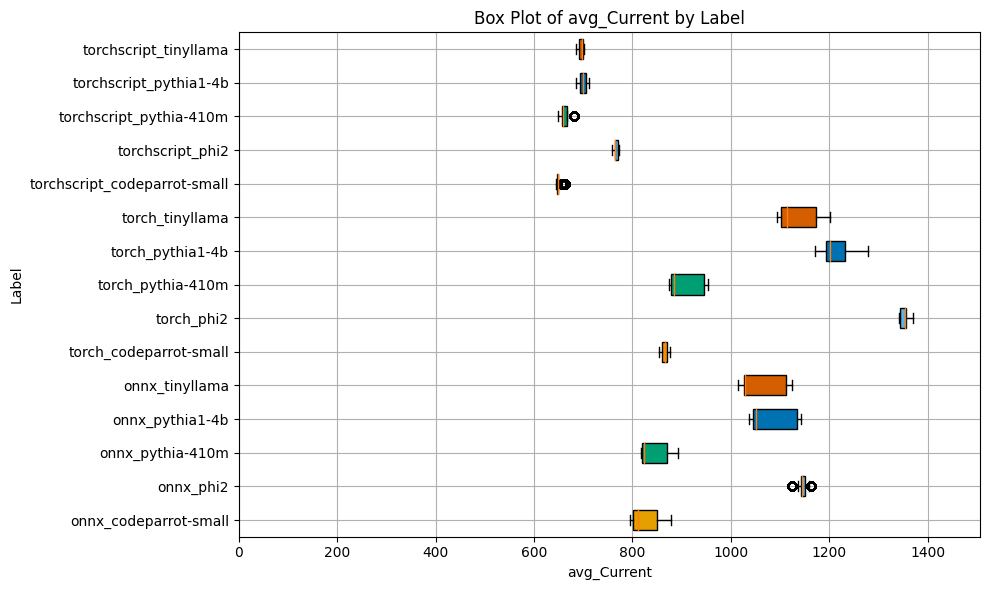

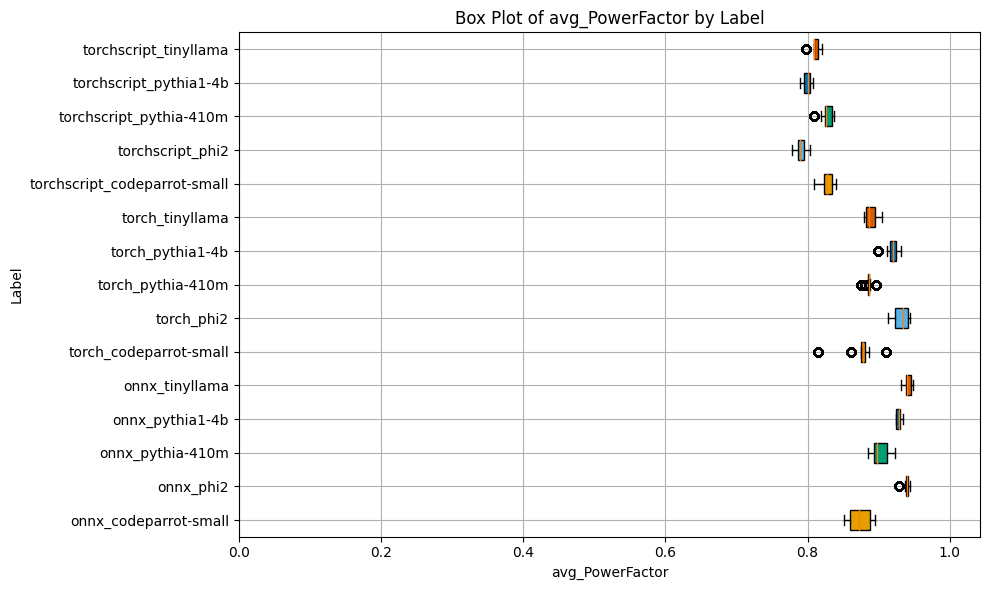

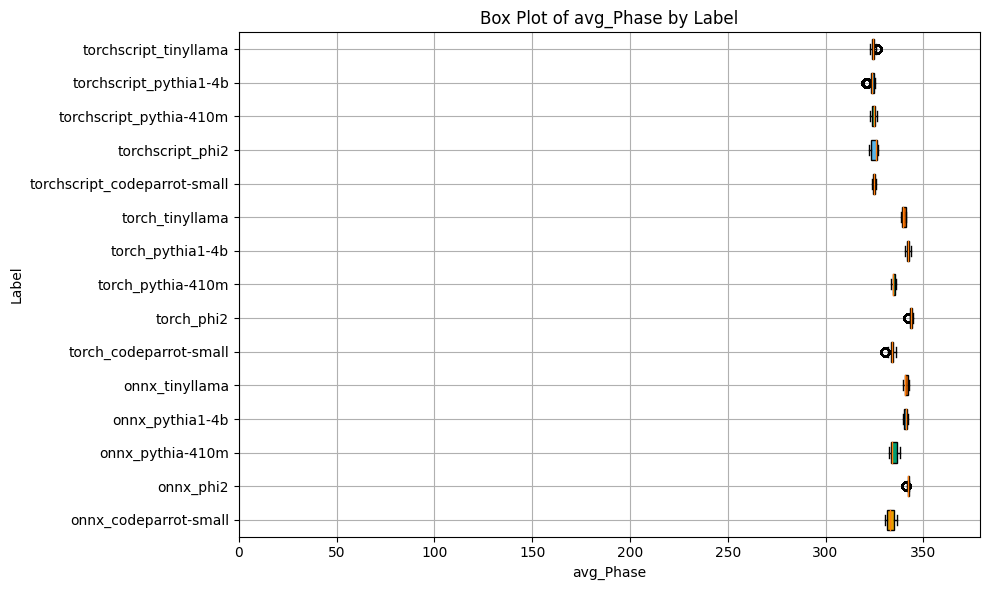

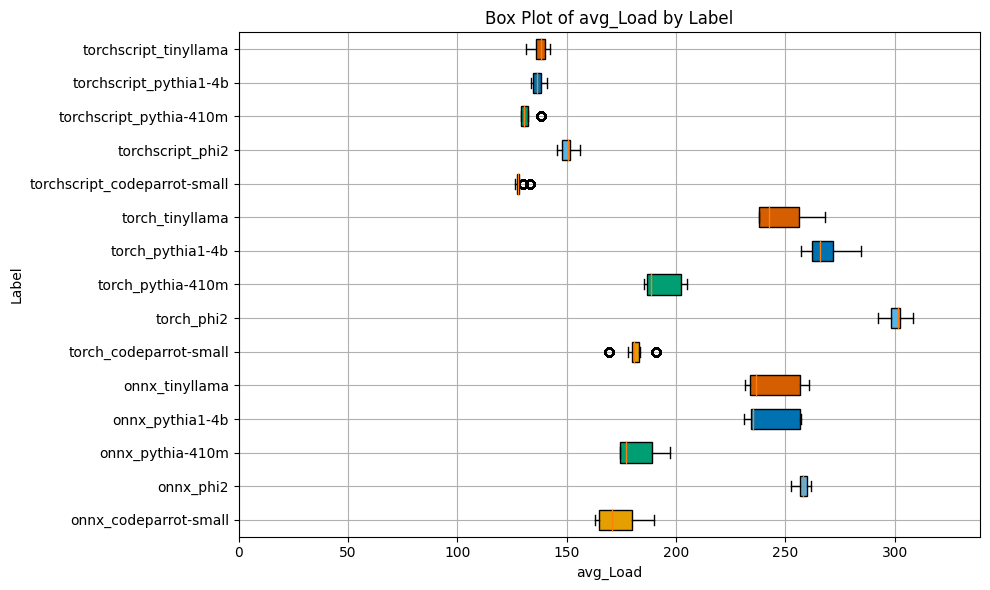

In [95]:
#variables_to_plot = ['Energy (Wattmeter) [J]','Current [mA]','Power Factor [-]','Phase [°]' ,'Load [W]']
variables_to_plot = ['energy_joules_config','avg_Current','avg_PowerFactor','avg_Phase' ,'avg_Load']

# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
colors = colors[:num_models]

# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label'
    grouped = wattmeter_plot.groupby('label')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color

    # Customizing plot
    plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')
    plt.xlim([0,wattmeter_plot[variable].max()*1.1])
    plt.grid(True)
    
    plt.tight_layout()  # Adjust layout to make room for labels
    plt.savefig(save_dir + "wattmeter_"+variable) if SAVE_FIGS else print(f"SAVE_FIGS:{SAVE_FIGS}")

plt.show()


In [96]:
wattmeter_plot.columns

Index(['time', 'runtime', 'model', 'Current', 'PowerFactor', 'Phase', 'Energy',
       'EnergyNR', 'Load', 'label', 'energy_joules', 'energyNR_joules',
       'energy_joules_config', 'energyNR_joules_config', 'avg_Current',
       'avg_PowerFactor', 'avg_Phase', 'avg_Load', 'experiment'],
      dtype='object')

In [97]:
#variables_to_plot = ['Energy (Wattmeter) [J]','Current [mA]','Power Factor [-]','Phase [°]' ,'Load [W]']
#variables_to_plot = ['energy_joules_config','avg_Current','avg_PowerFactor','avg_Phase' ,'avg_Load']

resource_wattmeter = wattmeter_plot[['label','experiment','avg_Current','avg_PowerFactor','avg_Phase' ,'avg_Load']]
resource_wattmeter

,label,experiment,avg_Current,avg_PowerFactor,avg_Phase,avg_Load
0,torch_pythia1-4b,1,1278.477341,0.931662,343.706465,284.371601
1,torch_pythia1-4b,1,1278.477341,0.931662,343.706465,284.371601
2,torch_pythia1-4b,1,1278.477341,0.931662,343.706465,284.371601
3,torch_pythia1-4b,1,1278.477341,0.931662,343.706465,284.371601
4,torch_pythia1-4b,1,1278.477341,0.931662,343.706465,284.371601
...,...,...,...,...,...,...
43816,torchscript_phi2,9,764.350575,0.778851,326.560287,149.465517
43817,torchscript_phi2,9,764.350575,0.778851,326.560287,149.465517
43818,torchscript_phi2,9,764.350575,0.778851,326.560287,149.465517
43819,torchscript_phi2,9,764.350575,0.778851,326.560287,149.465517


In [98]:
resource_wattmeter.to_csv(tables_dir+'final_wattmeter_data.csv', index=False) if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")

In [99]:

resource_wattmeter = resource_wattmeter.drop(columns = ['experiment'])

In [100]:
# Calculate mean values for each label
df = resource_wattmeter
median_resource_wattmeter = df.groupby('label').median()

# Optionally, you might want to reset the index if you need 'label' as a column
median_resource_wattmeter.reset_index(inplace=True)

#median_energy_values = median_energy_values.drop(columns = ['experiment'])
median_resource_wattmeter

,label,avg_Current,avg_PowerFactor,avg_Phase,avg_Load
0,onnx_codeparrot-small,812.274286,0.873060,333.119314,170.890052
1,onnx_phi2,1144.408710,0.939441,342.344874,257.793515
2,onnx_pythia-410m,823.982036,0.897690,333.860965,176.895210
3,onnx_pythia1-4b,1051.168699,0.928211,340.940488,235.359756
4,onnx_tinyllama,1029.382530,0.939639,340.806472,236.316265
5,torch_codeparrot-small,866.060606,0.877576,333.809756,180.750000
6,torch_phi2,1355.135321,0.933647,343.681053,301.425968
7,torch_pythia-410m,884.294833,0.885805,334.731261,188.335866
8,torch_pythia1-4b,1201.219033,0.919804,341.912281,265.794562
9,torch_tinyllama,1114.073171,0.887058,339.565655,242.341463


In [101]:
# Split the 'label' column into 'runtime' and 'model'
median_resource_wattmeter[['runtime', 'model']] = median_resource_wattmeter['label'].str.split('_', n=1, expand=True)
median_resource_wattmeter

,label,avg_Current,avg_PowerFactor,avg_Phase,avg_Load,runtime,model
0,onnx_codeparrot-small,812.274286,0.873060,333.119314,170.890052,onnx,codeparrot-small
1,onnx_phi2,1144.408710,0.939441,342.344874,257.793515,onnx,phi2
2,onnx_pythia-410m,823.982036,0.897690,333.860965,176.895210,onnx,pythia-410m
3,onnx_pythia1-4b,1051.168699,0.928211,340.940488,235.359756,onnx,pythia1-4b
4,onnx_tinyllama,1029.382530,0.939639,340.806472,236.316265,onnx,tinyllama
5,torch_codeparrot-small,866.060606,0.877576,333.809756,180.750000,torch,codeparrot-small
6,torch_phi2,1355.135321,0.933647,343.681053,301.425968,torch,phi2
7,torch_pythia-410m,884.294833,0.885805,334.731261,188.335866,torch,pythia-410m
8,torch_pythia1-4b,1201.219033,0.919804,341.912281,265.794562,torch,pythia1-4b
9,torch_tinyllama,1114.073171,0.887058,339.565655,242.341463,torch,tinyllama


In [102]:
# Define the new order of the columns
#new_order = ['label', 'Used memory (Energibridge) [B]','CPU usage (Energibridge) [%]', 'runtime', 'model']
new_order= list(median_resource_wattmeter.columns[-2:]) + list(median_resource_wattmeter.columns[:-2])
# Reorder the columns by indexing in the new order
median_resource_wattmeter = median_resource_wattmeter[new_order]
median_resource_wattmeter

,runtime,model,label,avg_Current,avg_PowerFactor,avg_Phase,avg_Load
0,onnx,codeparrot-small,onnx_codeparrot-small,812.274286,0.873060,333.119314,170.890052
1,onnx,phi2,onnx_phi2,1144.408710,0.939441,342.344874,257.793515
2,onnx,pythia-410m,onnx_pythia-410m,823.982036,0.897690,333.860965,176.895210
3,onnx,pythia1-4b,onnx_pythia1-4b,1051.168699,0.928211,340.940488,235.359756
4,onnx,tinyllama,onnx_tinyllama,1029.382530,0.939639,340.806472,236.316265
5,torch,codeparrot-small,torch_codeparrot-small,866.060606,0.877576,333.809756,180.750000
6,torch,phi2,torch_phi2,1355.135321,0.933647,343.681053,301.425968
7,torch,pythia-410m,torch_pythia-410m,884.294833,0.885805,334.731261,188.335866
8,torch,pythia1-4b,torch_pythia1-4b,1201.219033,0.919804,341.912281,265.794562
9,torch,tinyllama,torch_tinyllama,1114.073171,0.887058,339.565655,242.341463


In [103]:
if SAVE_TABLES:
    median_resource_wattmeter.to_csv(tables_dir+'median_resource_wattmeter.csv', index=False)


In [104]:
median_resource_wattmeter = median_resource_wattmeter.drop(columns = ['label'])


In [105]:
filename = tables_dir + 'median_resource_wattmeter.tex'
save_latex_table(median_resource_wattmeter,filename)

\begin{tabular}{llrrrr}
\toprule
runtime & model & avg Current & avg PowerFactor & avg Phase & avg Load \\
\midrule
onnx & codeparrot-small & 812.274286 & 0.873060 & 333.119314 & 170.890052 \\
onnx & phi2 & 1144.408710 & 0.939441 & 342.344874 & 257.793515 \\
onnx & pythia-410m & 823.982036 & 0.897690 & 333.860965 & 176.895210 \\
onnx & pythia1-4b & 1051.168699 & 0.928211 & 340.940488 & 235.359756 \\
onnx & tinyllama & 1029.382530 & 0.939639 & 340.806472 & 236.316265 \\
torch & codeparrot-small & 866.060606 & 0.877576 & 333.809756 & 180.750000 \\
torch & phi2 & 1355.135321 & 0.933647 & 343.681053 & 301.425968 \\
torch & pythia-410m & 884.294833 & 0.885805 & 334.731261 & 188.335866 \\
torch & pythia1-4b & 1201.219033 & 0.919804 & 341.912281 & 265.794562 \\
torch & tinyllama & 1114.073171 & 0.887058 & 339.565655 & 242.341463 \\
torchscript & codeparrot-small & 648.981818 & 0.826909 & 324.776091 & 127.730303 \\
torchscript & phi2 & 765.290131 & 0.789657 & 325.556839 & 150.551724 \\
torchsc

In [106]:
# # Convert DataFrame to LaTeX table
# latex_table = median_resource_wattmeter.to_latex(index=False)


# # Define the filename
# filename = tables_dir + 'median_resource_wattmeter.tex'

# # Open the file in write mode
# with open(filename, 'w') as file:
#     file.write(latex_table)


# # Print LaTeX table
# print(latex_table)

# Execution time


## Duration

In [107]:
# Path where the CSV files are stored
path = "D:/GAISSA/energy-repo/last_repo/june_gpu_test//"  # Adjust this path to your CSV files location
all_files = glob.glob(path + "/results_*/processed/time_marks.csv")
#all_files=all_files[:4]
all_files

['D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_1\\processed\\time_marks.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_10\\processed\\time_marks.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_2\\processed\\time_marks.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_3\\processed\\time_marks.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_4\\processed\\time_marks.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_5\\processed\\time_marks.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_6\\processed\\time_marks.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_7\\processed\\time_marks.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_8\\processed\\time_marks.csv',
 'D:/GAISSA/energy-repo/last_repo/june_gpu_test\\results_9\\processed\\time_marks.csv']

In [108]:
result_numbers = []

li = []
for my_file in all_files:
    # The regex pattern to find "results_" followed by one or more digits
    df = pd.read_csv(my_file, index_col=None, header=0)
    
    match = re.search(r'results_(\d+)', my_file)
    if match:
        # Append the found number to the list
        result_numbers.append(int(match.group(1)))

    df['experiment'] = result_numbers[-1]
    li.append(df)

print(result_numbers)
# Combine all data into one DataFrame
time_df = pd.concat(li, axis=0, ignore_index=True)
time_df

[1, 10, 2, 3, 4, 5, 6, 7, 8, 9]


,Unnamed: 0,time,runtime,model,engine,model_name,start_end,file,label,duration,label_time,experiment
0,0,2024-06-08 21:41:59.000000,-,IDLE,NaN,NaN,NaN,runall,idle,NaN,-_IDLE_inference,1
1,1,2024-06-08 21:47:00.000000,torch,START,NaN,NaN,NaN,runall,torch_START,301.000000,torch_START_inference,1
2,2,2024-06-08 21:47:00.919120,NaN,NaN,torch,pythia1-4b,1.0,load_times,torch_pythia1-4b,0.919120,NaN,1
3,3,2024-06-08 21:47:02.775654,NaN,NaN,torch,pythia1-4b,0.0,load_times,torch_pythia1-4b,1.856534,torch_pythia1-4b_load,1
4,4,2024-06-08 21:50:13.000000,torch,pythia1-4b,NaN,NaN,NaN,runall,torch_pythia1-4b,190.224346,torch_pythia1-4b_inference,1
...,...,...,...,...,...,...,...,...,...,...,...,...
595,55,2024-06-30 15:23:51.000000,torchscript,START,NaN,NaN,NaN,runall,torchscript_START,1.000000,torchscript_START_inference,9
596,56,2024-06-30 15:23:52.387048,NaN,NaN,torchscript,phi2,1.0,load_times,torchscript_phi2,1.387048,NaN,9
597,57,2024-06-30 15:23:59.850313,NaN,NaN,torchscript,phi2,0.0,load_times,torchscript_phi2,7.463265,torchscript_phi2_load,9
598,58,2024-06-30 15:25:40.000000,torchscript,phi2,NaN,NaN,NaN,runall,torchscript_phi2,100.149687,torchscript_phi2_inference,9


In [109]:
# ## add number of experiment

# # List to hold data from each file
# li = []

# # Read each file and append to list
# n=1
# for filename in all_files:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     df['experiment'] = n
#     li.append(df)
#     n+=1
    

# # Combine all data into one DataFrame
# combined_df = pd.concat(li, axis=0, ignore_index=True)
# combined_df

In [110]:
time_df.columns

Index(['Unnamed: 0', 'time', 'runtime', 'model', 'engine', 'model_name',
       'start_end', 'file', 'label', 'duration', 'label_time', 'experiment'],
      dtype='object')

In [111]:
variables_to_plot = ['duration', ]


In [112]:
time_df[time_df['label_time'].str.startswith('torch_', na=False) & time_df['label_time'].str.endswith('inference', na=False) ]

,Unnamed: 0,time,runtime,model,engine,model_name,start_end,file,label,duration,label_time,experiment
1,1,2024-06-08 21:47:00.000000,torch,START,NaN,NaN,NaN,runall,torch_START,301.000000,torch_START_inference,1
4,4,2024-06-08 21:50:13.000000,torch,pythia1-4b,NaN,NaN,NaN,runall,torch_pythia1-4b,190.224346,torch_pythia1-4b_inference,1
7,7,2024-06-08 21:53:25.000000,torch,tinyllama,NaN,NaN,NaN,runall,torch_tinyllama,188.823235,torch_tinyllama_inference,1
10,10,2024-06-08 21:57:41.000000,torch,error_phi2,NaN,NaN,NaN,runall,torch_error_phi2,251.210585,torch_error_phi2_inference,1
13,13,2024-06-08 21:59:17.000000,torch,codeparrot-small,NaN,NaN,NaN,runall,torch_codeparrot-small,94.157740,torch_codeparrot-small_inference,1
...,...,...,...,...,...,...,...,...,...,...,...,...
550,10,2024-06-11 18:35:06.000000,torch,codeparrot-small,NaN,NaN,NaN,runall,torch_codeparrot-small,94.652308,torch_codeparrot-small_inference,9
553,13,2024-06-11 18:38:16.000000,torch,pythia-410m,NaN,NaN,NaN,runall,torch_pythia-410m,188.724857,torch_pythia-410m_inference,9
556,16,2024-06-11 18:42:32.000000,torch,error_phi2,NaN,NaN,NaN,runall,torch_error_phi2,251.136543,torch_error_phi2_inference,9
591,51,2024-06-30 15:19:34.000000,torch,START,NaN,NaN,NaN,runall,torch_START,1.000000,torch_START_inference,9


<Figure size 2000x600 with 0 Axes>

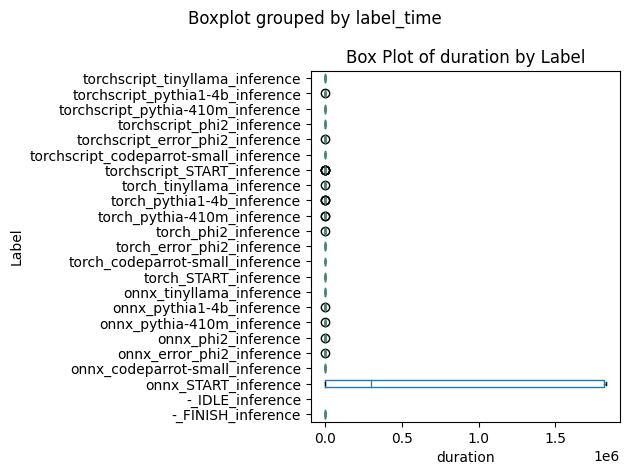

In [113]:

combined_df = time_df
# Assuming combined_df is already created and contains the data

# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']

# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)


# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(20, 6))
    # Setting vert=False makes the box plots horizontal
    #plot_df = combined_df[combined_df['label_time'].str.startswith('torch_', na=False)]
    #plot_df = combined_df[combined_df['label_time'].str.startswith('torch_', na=False) & combined_df['label_time'].str.endswith('inference', na=False) ]
    plot_df = combined_df[ combined_df['label_time'].str.endswith('inference', na=False) ]
    
    plot_df.boxplot(column=variable, by='label_time', grid=False, vert=False) #df[df['A'].notna()]
    plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.ylabel('Label')
    plt.yticks(rotation=0)  # Rotate label ticks if necessary
    plt.tight_layout()  # Adjust layout to make room for labels
    #plt.xlim([0,20])
    #plt.savefig(path+"duration_runall")
plt.show()


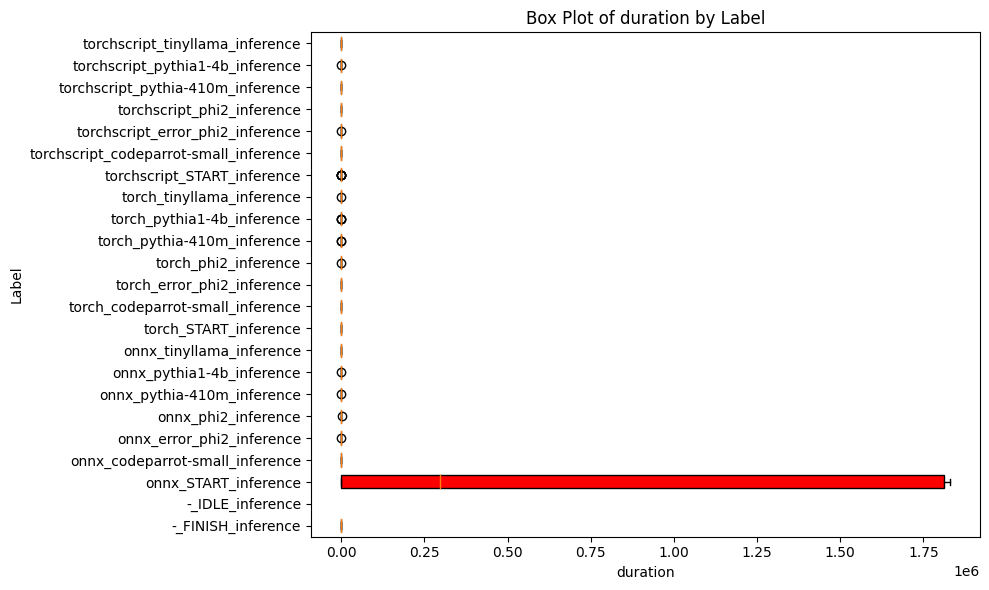

In [114]:

# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']

# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label'
    plot_df = combined_df[ combined_df['label_time'].str.endswith('inference', na=False) ]
    
    grouped = plot_df.groupby('label_time')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color

    # Customizing plot
    plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')
    plt.tight_layout()  # Adjust layout to make room for labels

plt.show()


In [115]:
#condition = time_df['label'].str.endswith('phi2')

#time_plot = remove_condition_rows( condition, time_df)
time_plot = time_df
time_plot

,Unnamed: 0,time,runtime,model,engine,model_name,start_end,file,label,duration,label_time,experiment
0,0,2024-06-08 21:41:59.000000,-,IDLE,NaN,NaN,NaN,runall,idle,NaN,-_IDLE_inference,1
1,1,2024-06-08 21:47:00.000000,torch,START,NaN,NaN,NaN,runall,torch_START,301.000000,torch_START_inference,1
2,2,2024-06-08 21:47:00.919120,NaN,NaN,torch,pythia1-4b,1.0,load_times,torch_pythia1-4b,0.919120,NaN,1
3,3,2024-06-08 21:47:02.775654,NaN,NaN,torch,pythia1-4b,0.0,load_times,torch_pythia1-4b,1.856534,torch_pythia1-4b_load,1
4,4,2024-06-08 21:50:13.000000,torch,pythia1-4b,NaN,NaN,NaN,runall,torch_pythia1-4b,190.224346,torch_pythia1-4b_inference,1
...,...,...,...,...,...,...,...,...,...,...,...,...
595,55,2024-06-30 15:23:51.000000,torchscript,START,NaN,NaN,NaN,runall,torchscript_START,1.000000,torchscript_START_inference,9
596,56,2024-06-30 15:23:52.387048,NaN,NaN,torchscript,phi2,1.0,load_times,torchscript_phi2,1.387048,NaN,9
597,57,2024-06-30 15:23:59.850313,NaN,NaN,torchscript,phi2,0.0,load_times,torchscript_phi2,7.463265,torchscript_phi2_load,9
598,58,2024-06-30 15:25:40.000000,torchscript,phi2,NaN,NaN,NaN,runall,torchscript_phi2,100.149687,torchscript_phi2_inference,9


In [116]:
condition = time_plot['label'].str.startswith('-')
#remove_condition_rows( condition, energi_df)
#energi_df = energi_df[~condition]
time_plot = remove_condition_rows( condition, time_plot)

condition = time_plot['label'].str.startswith('idle')
time_plot = remove_condition_rows( condition, time_plot)

condition = time_plot['label'].str.startswith('finish')
time_plot = remove_condition_rows( condition, time_plot)

condition = time_plot['label'].str.endswith('START')
time_plot = remove_condition_rows( condition, time_plot)

time_plot

,Unnamed: 0,time,runtime,model,engine,model_name,start_end,file,label,duration,label_time,experiment
2,2,2024-06-08 21:47:00.919120,NaN,NaN,torch,pythia1-4b,1.0,load_times,torch_pythia1-4b,0.919120,NaN,1
3,3,2024-06-08 21:47:02.775654,NaN,NaN,torch,pythia1-4b,0.0,load_times,torch_pythia1-4b,1.856534,torch_pythia1-4b_load,1
4,4,2024-06-08 21:50:13.000000,torch,pythia1-4b,NaN,NaN,NaN,runall,torch_pythia1-4b,190.224346,torch_pythia1-4b_inference,1
5,5,2024-06-08 21:50:14.825155,NaN,NaN,torch,tinyllama,1.0,load_times,torch_tinyllama,1.825155,NaN,1
6,6,2024-06-08 21:50:16.176765,NaN,NaN,torch,tinyllama,0.0,load_times,torch_tinyllama,1.351610,torch_tinyllama_load,1
...,...,...,...,...,...,...,...,...,...,...,...,...
593,53,2024-06-30 15:19:38.616096,NaN,NaN,torch,phi2,0.0,load_times,torch_phi2,3.541039,torch_phi2_load,9
594,54,2024-06-30 15:23:50.000000,torch,phi2,NaN,NaN,NaN,runall,torch_phi2,251.383904,torch_phi2_inference,9
596,56,2024-06-30 15:23:52.387048,NaN,NaN,torchscript,phi2,1.0,load_times,torchscript_phi2,1.387048,NaN,9
597,57,2024-06-30 15:23:59.850313,NaN,NaN,torchscript,phi2,0.0,load_times,torchscript_phi2,7.463265,torchscript_phi2_load,9


In [117]:
condition = time_plot['label'].str.endswith('error_phi2')
time_plot = remove_condition_rows( condition, time_plot)

time_plot

,Unnamed: 0,time,runtime,model,engine,model_name,start_end,file,label,duration,label_time,experiment
2,2,2024-06-08 21:47:00.919120,NaN,NaN,torch,pythia1-4b,1.0,load_times,torch_pythia1-4b,0.919120,NaN,1
3,3,2024-06-08 21:47:02.775654,NaN,NaN,torch,pythia1-4b,0.0,load_times,torch_pythia1-4b,1.856534,torch_pythia1-4b_load,1
4,4,2024-06-08 21:50:13.000000,torch,pythia1-4b,NaN,NaN,NaN,runall,torch_pythia1-4b,190.224346,torch_pythia1-4b_inference,1
5,5,2024-06-08 21:50:14.825155,NaN,NaN,torch,tinyllama,1.0,load_times,torch_tinyllama,1.825155,NaN,1
6,6,2024-06-08 21:50:16.176765,NaN,NaN,torch,tinyllama,0.0,load_times,torch_tinyllama,1.351610,torch_tinyllama_load,1
...,...,...,...,...,...,...,...,...,...,...,...,...
593,53,2024-06-30 15:19:38.616096,NaN,NaN,torch,phi2,0.0,load_times,torch_phi2,3.541039,torch_phi2_load,9
594,54,2024-06-30 15:23:50.000000,torch,phi2,NaN,NaN,NaN,runall,torch_phi2,251.383904,torch_phi2_inference,9
596,56,2024-06-30 15:23:52.387048,NaN,NaN,torchscript,phi2,1.0,load_times,torchscript_phi2,1.387048,NaN,9
597,57,2024-06-30 15:23:59.850313,NaN,NaN,torchscript,phi2,0.0,load_times,torchscript_phi2,7.463265,torchscript_phi2_load,9


In [118]:
time_inference_df = time_plot[ time_plot['label_time'].str.endswith('inference', na=False) ]
print(len(time_inference_df))
time_inference_df

150


,Unnamed: 0,time,runtime,model,engine,model_name,start_end,file,label,duration,label_time,experiment
4,4,2024-06-08 21:50:13.000000,torch,pythia1-4b,NaN,NaN,NaN,runall,torch_pythia1-4b,190.224346,torch_pythia1-4b_inference,1
7,7,2024-06-08 21:53:25.000000,torch,tinyllama,NaN,NaN,NaN,runall,torch_tinyllama,188.823235,torch_tinyllama_inference,1
13,13,2024-06-08 21:59:17.000000,torch,codeparrot-small,NaN,NaN,NaN,runall,torch_codeparrot-small,94.157740,torch_codeparrot-small_inference,1
16,16,2024-06-08 22:02:28.000000,torch,pythia-410m,NaN,NaN,NaN,runall,torch_pythia-410m,189.240295,torch_pythia-410m_inference,1
20,20,2024-06-08 22:11:32.000000,onnx,pythia1-4b,NaN,NaN,NaN,runall,onnx_pythia1-4b,535.773089,onnx_pythia1-4b_inference,1
...,...,...,...,...,...,...,...,...,...,...,...,...
580,40,2024-06-11 19:24:04.000000,torchscript,codeparrot-small,NaN,NaN,NaN,runall,torchscript_codeparrot-small,94.919234,torchscript_codeparrot-small_inference,9
583,43,2024-06-11 19:25:43.000000,torchscript,pythia-410m,NaN,NaN,NaN,runall,torchscript_pythia-410m,96.801698,torchscript_pythia-410m_inference,9
590,50,2024-06-30 15:19:33.000000,onnx,phi2,NaN,NaN,NaN,runall,onnx_phi2,917.900571,onnx_phi2_inference,9
594,54,2024-06-30 15:23:50.000000,torch,phi2,NaN,NaN,NaN,runall,torch_phi2,251.383904,torch_phi2_inference,9


In [119]:
time_inference_df['duration'].max()

917.900571

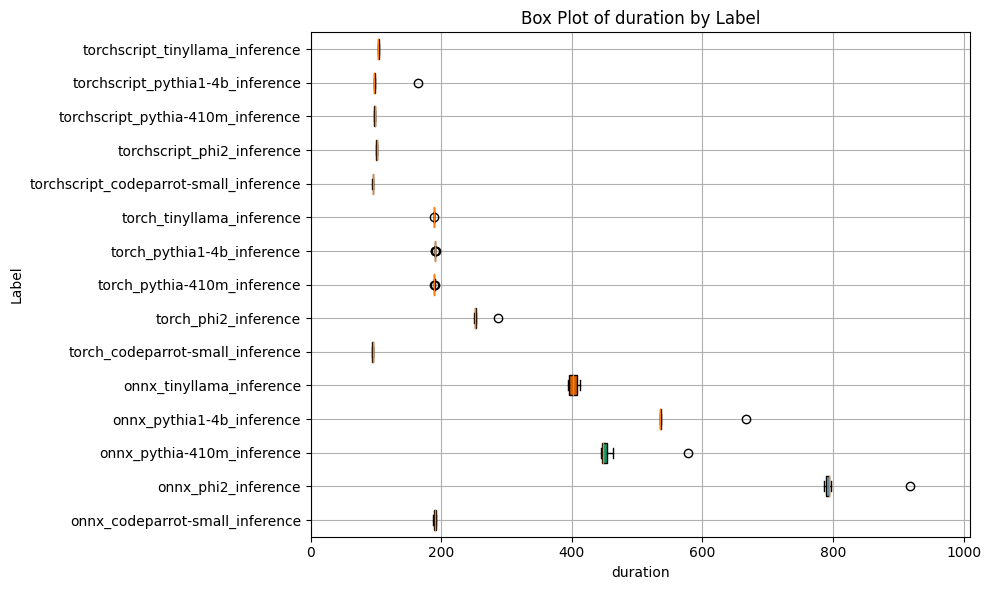

In [120]:

#combined_df = time_plot

# Define some colors for the boxes
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'orange', 'yellow', 'cyan']
colors=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]
colors = colors[:num_models]

# Make the color list cyclic in case there are more groups than colors
color_cycle = itertools.cycle(colors)

# Generate box plots
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Group data by 'label'
    #plot_df = combined_df[ combined_df['label_time'].str.endswith('inference', na=False) ]
    plot_df = time_inference_df
    
    grouped = plot_df.groupby('label_time')
    
    # We need to know the number of groups
    num_groups = len(grouped)
    
    # Creating a box for each group
    for i, (name, group) in enumerate(grouped):
        # Plot only the part of the data for this group
        # `positions` gives the position of the box in the plot
        plt.boxplot(group[variable].dropna(), positions=[i], widths=0.6, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=next(color_cycle)))  # Use cyclic color

    # Customizing plot
    plt.title(f'Box Plot of {variable} by Label')
    plt.xlabel(variable)
    plt.yticks(np.arange(num_groups), grouped.groups.keys())  # Set y-ticks to group names
    plt.ylabel('Label')
    plt.xlim([0,plot_df['duration'].max()*1.1])
    plt.grid(True)
    
    plt.tight_layout()  # Adjust layout to make room for labels
    plt.savefig(save_dir+ "duration_marks.png") if SAVE_FIGS else print(f"SAVE_FIGS:{SAVE_FIGS}")

plt.show()


In [121]:
time_inference_df.head()

,Unnamed: 0,time,runtime,model,engine,model_name,start_end,file,label,duration,label_time,experiment
4,4,2024-06-08 21:50:13.000000,torch,pythia1-4b,NaN,NaN,NaN,runall,torch_pythia1-4b,190.224346,torch_pythia1-4b_inference,1
7,7,2024-06-08 21:53:25.000000,torch,tinyllama,NaN,NaN,NaN,runall,torch_tinyllama,188.823235,torch_tinyllama_inference,1
13,13,2024-06-08 21:59:17.000000,torch,codeparrot-small,NaN,NaN,NaN,runall,torch_codeparrot-small,94.157740,torch_codeparrot-small_inference,1
16,16,2024-06-08 22:02:28.000000,torch,pythia-410m,NaN,NaN,NaN,runall,torch_pythia-410m,189.240295,torch_pythia-410m_inference,1
20,20,2024-06-08 22:11:32.000000,onnx,pythia1-4b,NaN,NaN,NaN,runall,onnx_pythia1-4b,535.773089,onnx_pythia1-4b_inference,1


In [122]:
time_inference_df = time_inference_df[['label','experiment','duration',]]
time_inference_df

,label,experiment,duration
4,torch_pythia1-4b,1,190.224346
7,torch_tinyllama,1,188.823235
13,torch_codeparrot-small,1,94.157740
16,torch_pythia-410m,1,189.240295
20,onnx_pythia1-4b,1,535.773089
...,...,...,...
580,torchscript_codeparrot-small,9,94.919234
583,torchscript_pythia-410m,9,96.801698
590,onnx_phi2,9,917.900571
594,torch_phi2,9,251.383904


In [123]:
time_inference_df.to_csv(tables_dir+'final_inference_time_data.csv', index=False) if SAVE_TABLES else print(f"SAVE_TABLES:{SAVE_TABLES}")

In [124]:
time_inference_df = time_inference_df.drop(columns = ['experiment'])

In [125]:
# Calculate mean values for each label
df = time_inference_df
median_time_inference = df.groupby('label').median()

# Optionally, you might want to reset the index if you need 'label' as a column
median_time_inference.reset_index(inplace=True)

#median_energy_values = median_energy_values.drop(columns = ['experiment'])
median_time_inference

,label,duration
0,onnx_codeparrot-small,191.048335
1,onnx_phi2,793.478886
2,onnx_pythia-410m,447.527716
3,onnx_pythia1-4b,535.354030
4,onnx_tinyllama,401.162165
5,torch_codeparrot-small,94.684550
6,torch_phi2,251.969879
7,torch_pythia-410m,189.228686
8,torch_pythia1-4b,190.243684
9,torch_tinyllama,188.817669


In [126]:
# Split the 'label' column into 'runtime' and 'model'
median_time_inference[['runtime', 'model']] = median_time_inference['label'].str.split('_', n=1, expand=True)
median_time_inference

,label,duration,runtime,model
0,onnx_codeparrot-small,191.048335,onnx,codeparrot-small
1,onnx_phi2,793.478886,onnx,phi2
2,onnx_pythia-410m,447.527716,onnx,pythia-410m
3,onnx_pythia1-4b,535.354030,onnx,pythia1-4b
4,onnx_tinyllama,401.162165,onnx,tinyllama
5,torch_codeparrot-small,94.684550,torch,codeparrot-small
6,torch_phi2,251.969879,torch,phi2
7,torch_pythia-410m,189.228686,torch,pythia-410m
8,torch_pythia1-4b,190.243684,torch,pythia1-4b
9,torch_tinyllama,188.817669,torch,tinyllama


In [127]:
new_order= list(median_time_inference.columns[-2:]) + list(median_time_inference.columns[:-2])
# Reorder the columns by indexing in the new order
median_time_inference = median_time_inference[new_order]
median_time_inference

,runtime,model,label,duration
0,onnx,codeparrot-small,onnx_codeparrot-small,191.048335
1,onnx,phi2,onnx_phi2,793.478886
2,onnx,pythia-410m,onnx_pythia-410m,447.527716
3,onnx,pythia1-4b,onnx_pythia1-4b,535.354030
4,onnx,tinyllama,onnx_tinyllama,401.162165
5,torch,codeparrot-small,torch_codeparrot-small,94.684550
6,torch,phi2,torch_phi2,251.969879
7,torch,pythia-410m,torch_pythia-410m,189.228686
8,torch,pythia1-4b,torch_pythia1-4b,190.243684
9,torch,tinyllama,torch_tinyllama,188.817669


In [128]:
if SAVE_TABLES:
    median_time_inference.to_csv(tables_dir+'median_time_inference.csv', index=False)

In [129]:
median_time_inference = median_time_inference.drop(columns = ['label'])

In [130]:
filename = tables_dir + 'median_time_inference.tex'
save_latex_table(median_time_inference,filename)

\begin{tabular}{llr}
\toprule
runtime & model & duration \\
\midrule
onnx & codeparrot-small & 191.048335 \\
onnx & phi2 & 793.478886 \\
onnx & pythia-410m & 447.527716 \\
onnx & pythia1-4b & 535.354030 \\
onnx & tinyllama & 401.162165 \\
torch & codeparrot-small & 94.684550 \\
torch & phi2 & 251.969879 \\
torch & pythia-410m & 189.228686 \\
torch & pythia1-4b & 190.243684 \\
torch & tinyllama & 188.817669 \\
torchscript & codeparrot-small & 94.751527 \\
torchscript & phi2 & 100.872742 \\
torchscript & pythia-410m & 97.618725 \\
torchscript & pythia1-4b & 97.478730 \\
torchscript & tinyllama & 103.467378 \\
\bottomrule
\end{tabular}

